# 🥗🍎 FOOD FRESHNESS DETECTION PROJECT 🧪🕵️‍♂️

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Data Preparation

## Copying 100 images from each folder - Randomly

In [2]:
import os
import shutil
import random
from pathlib import Path

# Source directory
source_dir = Path("/kaggle/input/food-freshness-dataset/Dataset")

# Destination directory
destination_dir = Path("/kaggle/working/FoodFreshnessSample")
destination_dir.mkdir(parents=True, exist_ok=True)

# Allowed image extensions
allowed_ext = [".jpg", ".jpeg", ".png"]

# Loop through Fresh and Rotten folders
for freshness_type in ["Fresh", "Rotten"]:
    freshness_path = source_dir / freshness_type

    for category_folder in freshness_path.iterdir():
        if category_folder.is_dir():
            # Filter only image files with allowed extensions
            images = [img for img in category_folder.iterdir() if img.suffix.lower() in allowed_ext]

            # Randomly select 100 images (or all if less)
            selected_images = random.sample(images, 100) if len(images) >= 100 else images

            # Destination subfolder path
            dest_subfolder = destination_dir / freshness_type / category_folder.name
            dest_subfolder.mkdir(parents=True, exist_ok=True)

            # Copy files
            for img_path in selected_images:
                shutil.copy(img_path, dest_subfolder)

print("✅ Randomly selected and copied up to 100 images from each folder!")

✅ Randomly selected and copied up to 100 images from each folder!


### CSV File Preparation

In [3]:
import os
import pandas as pd

# Dataset path
dataset_path = "/kaggle/working/FoodFreshnessSample"

# Define valid image extensions
valid_extensions = ('.jpg', '.jpeg', '.png')

# List to store the data
data = []

# Loop through 'Fresh' and 'Rotten'
for freshness_type in ['Fresh', 'Rotten']:
    freshness_dir = os.path.join(dataset_path, freshness_type)

    # Go through each category folder
    for category in os.listdir(freshness_dir):
        category_path = os.path.join(freshness_dir, category)

        if os.path.isdir(category_path):
            image_files = [f for f in os.listdir(category_path) if f.lower().endswith(valid_extensions)]
            count = len(image_files)

            # Append to data list
            data.append({
                'Category': category,
                'Freshness': freshness_type,
                'Folder Path': f"{freshness_type}/{category}",
                'Image Count': count
            })

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV
csv_path = "/kaggle/working/file_counts.csv"
df.to_csv(csv_path, index=False)

print(f"✅ File counts saved to {csv_path}")

✅ File counts saved to /kaggle/working/file_counts.csv


## Renaming the Files

In [4]:
import os
from pathlib import Path

# Directory containing the copied 100 images
base_dir = Path("/kaggle/working/FoodFreshnessSample")

# Loop through Fresh and Rotten
for freshness_type in ["Fresh", "Rotten"]:
    freshness_path = base_dir / freshness_type

    for category_folder in freshness_path.iterdir():
        if category_folder.is_dir():
            folder_name = category_folder.name
            files = sorted([f for f in category_folder.iterdir() if f.is_file()])

            for idx, file_path in enumerate(files, start=1):
                # Keep original file extension
                extension = file_path.suffix
                new_name = f"{folder_name}_{idx}{extension}"
                new_path = category_folder / new_name

                # Rename the file
                file_path.rename(new_path)

print("✅ All files renamed successfully with folder name and index!")

✅ All files renamed successfully with folder name and index!


# Data Preprocessing 

In [5]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import MaxPooling2D
import tensorflow as tf

# Set dataset path
dataset_path = "/kaggle/working/FoodFreshnessSample"

# Image size
img_size = (128, 128)

# Store data and labels
X = []
y = []

# Loop through Fresh and Rotten
for freshness_type in ['Fresh', 'Rotten']:
    freshness_dir = os.path.join(dataset_path, freshness_type)

    for folder in os.listdir(freshness_dir):
        folder_path = os.path.join(freshness_dir, folder)

        if os.path.isdir(folder_path):
            for filename in tqdm(os.listdir(folder_path), desc=f"Processing {folder}"):
                file_path = os.path.join(folder_path, filename)
                try:
                    # Read image
                    img = cv2.imread(file_path)

                    # Noise Reduction (Gaussian Blur)
                    blurred = cv2.GaussianBlur(img, (5, 5), 0)

                    # Convert to Grayscale
                    gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

                    # Resize
                    resized = cv2.resize(gray, img_size)

                    # Edge Detection (Canny)
                    edges = cv2.Canny(resized, 100, 200)

                    # Normalize
                    normalized = edges / 255.0

                    # Reshape to (128, 128, 1)
                    normalized = np.expand_dims(normalized, axis=-1)

                    # Append data and label
                    X.append(normalized)
                    y.append(folder)
                except Exception as e:
                    print(f"❌ Error processing {file_path}: {e}")

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

print(f"✅ Dataset shape: {X.shape}")
print(f"✅ Labels shape: {y_categorical.shape}")

# Add MaxPooling2D layer for demonstration
# (you'll use this in your CNN model later)
example_input = tf.keras.Input(shape=(128, 128, 1))
pooled_output = MaxPooling2D(pool_size=(2, 2))(example_input)

print("✅ MaxPooling2D layer added (will be used in model).")

2025-04-15 19:01:56.997210: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744743717.256184      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744743717.329533      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Processing FreshTomato:  55%|█████▌    | 55/100 [00:00<00:00, 282.62it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
Processing RottenTomato:  34%|███▍      | 34/100 [00:00<00:00, 141.16it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorre

✅ Dataset shape: (2600, 128, 128, 1)
✅ Labels shape: (2600, 26)
✅ MaxPooling2D layer added (will be used in model).


# Data Augmentation

In [6]:
import cv2
import os
import numpy as np
from tqdm import tqdm

# Source and target paths
source_path = "/kaggle/working/FoodFreshnessSample"
augmented_path = "/kaggle/working/augmented_dataset"

# Create destination folders
os.makedirs(augmented_path, exist_ok=True)

# Image size
img_size = (128, 128)

# Augmentation functions
def rotate_image(img, angle):
    h, w = img.shape[:2]
    center = (w // 2, h // 2)
    rot_mat = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(img, rot_mat, (w, h))

def adjust_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv[:, :, 2] = np.clip(hsv[:, :, 2] + value, 0, 255)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

# Loop through each class folder
for freshness_type in ['Fresh', 'Rotten']:
    freshness_dir = os.path.join(source_path, freshness_type)
    for folder in os.listdir(freshness_dir):
        folder_path = os.path.join(freshness_dir, folder)
        target_folder = os.path.join(augmented_path, freshness_type, folder)
        os.makedirs(target_folder, exist_ok=True)

        for idx, filename in enumerate(tqdm(os.listdir(folder_path), desc=f"Augmenting {folder}")):
            file_path = os.path.join(folder_path, filename)
            img = cv2.imread(file_path)

            if img is None:
                continue

            # Resize
            img = cv2.resize(img, img_size)

            # 1. Original
            cv2.imwrite(os.path.join(target_folder, f"{folder}_{idx}_original.jpg"), img)

            # 2. Horizontal Flip
            flipped = cv2.flip(img, 1)
            cv2.imwrite(os.path.join(target_folder, f"{folder}_{idx}_flipped.jpg"), flipped)

            # 3. Random Rotation (20°)
            rotated = rotate_image(img, angle=20)
            cv2.imwrite(os.path.join(target_folder, f"{folder}_{idx}_rotated.jpg"), rotated)

            # 4. Brightness Increase
            brighter = adjust_brightness(img, value=40)
            cv2.imwrite(os.path.join(target_folder, f"{folder}_{idx}_bright.jpg"), brighter)

            # 5. 180° Rotation
            rotated_180 = rotate_image(img, angle=180)
            cv2.imwrite(os.path.join(target_folder, f"{folder}_{idx}_rotated180.jpg"), rotated_180)

Augmenting FreshTomato:  26%|██▌       | 26/100 [00:00<00:00, 259.01it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
Augmenting RottenTomato:  34%|███▍      | 34/100 [00:00<00:00, 228.87it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
Augmenting RottenTomato:  69%|██████▉   | 69/100 [00:00<00:00, 287.65it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning

### CSV File Prepatration

In [7]:
import os
import pandas as pd

# Dataset path
dataset_path = "/kaggle/working/augmented_dataset"

# Define valid image extensions
valid_extensions = ('.jpg', '.jpeg', '.png')

# List to store the data
data = []

# Loop through 'Fresh' and 'Rotten'
for freshness_type in ['Fresh', 'Rotten']:
    freshness_dir = os.path.join(dataset_path, freshness_type)

    # Go through each category folder
    for category in os.listdir(freshness_dir):
        category_path = os.path.join(freshness_dir, category)

        if os.path.isdir(category_path):
            image_files = [f for f in os.listdir(category_path) if f.lower().endswith(valid_extensions)]
            count = len(image_files)

            # Append to data list
            data.append({
                'Category': category,
                'Freshness': freshness_type,
                'Folder Path': f"{freshness_type}/{category}",
                'Image Count': count
            })

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV
csv_path = "/kaggle/working/file_counts_augmented.csv"
df.to_csv(csv_path, index=False)

print(f"✅ File counts saved to {csv_path}")

✅ File counts saved to /kaggle/working/file_counts_augmented.csv


# Clustering

"""
## Clustering Algorithms Comparison

This project demonstrates the use of three different clustering algorithms to group images of **Fresh** and **Rotten** food. Each algorithm has unique characteristics, making them suitable for different types of datasets.

### 1. **KMeans Clustering**
   - **Description**: 
     - KMeans is a centroid-based algorithm. It divides the data into `k` clusters by minimizing the variance within each cluster.
     - It requires the user to specify the number of clusters (`k`) in advance.
     - The algorithm is sensitive to the initial placement of the centroids, which may result in different outcomes for different initializations. This is addressed by running the algorithm multiple times and choosing the best result.
   
   - **How it Works**:
     1. Randomly initialize `k` centroids.
     2. Assign each data point to the closest centroid.
     3. Recompute the centroids as the mean of all points assigned to each centroid.
     4. Repeat steps 2 and 3 until convergence (no change in centroids).
   
   - **Pros**:
     - Efficient for large datasets.
     - Works well when clusters are spherical and equally sized.
   
   - **Cons**:
     - Must specify the number of clusters (`k`) upfront.
     - Sensitive to initial centroid positions.
     - Does not handle outliers well.

   - **Use Case**:
     - Suitable for well-defined, spherical clusters with roughly equal size and density.

### 2. **Agglomerative Clustering**
   - **Description**: 
     - Agglomerative Clustering is a hierarchical clustering algorithm that builds the hierarchy bottom-up. Initially, each data point is treated as its own cluster, and pairs of clusters are merged based on a similarity metric (e.g., Euclidean distance).
     - Unlike KMeans, it does not require specifying the number of clusters in advance. Instead, the user can choose the number of clusters by setting a distance threshold.
   
   - **How it Works**:
     1. Start with each data point as its own cluster.
     2. Compute the pairwise distances between clusters.
     3. Merge the two closest clusters.
     4. Repeat until the desired number of clusters is reached or all points are merged into one cluster.
   
   - **Pros**:
     - Does not require the number of clusters to be specified beforehand.
     - Provides a hierarchy of clusters, allowing for multi-level analysis.
   
   - **Cons**:
     - Can be computationally expensive (especially for large datasets).
     - Sensitive to the choice of distance metric and linkage criterion (e.g., single, complete, average).
   
   - **Use Case**:
     - Suitable for smaller datasets and when the user needs to explore the hierarchical relationships between data points.

### 3. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**
   - **Description**: 
     - DBSCAN is a density-based clustering algorithm that groups together points that are close to each other based on a density criterion. It can find arbitrarily shaped clusters and is particularly useful for identifying outliers.
     - Unlike KMeans, DBSCAN does not require specifying the number of clusters upfront. Instead, it requires two parameters: `eps` (the maximum distance between two points to be considered as neighbors) and `min_samples` (the minimum number of points required to form a dense region).
   
   - **How it Works**:
     1. Select a random unvisited point.
     2. Find all points within `eps` distance (i.e., neighbors).
     3. If the number of neighbors is greater than or equal to `min_samples`, mark the point as a core point and start growing a cluster by including all reachable points.
     4. If the number of neighbors is less than `min_samples`, mark the point as noise.
     5. Repeat for all points.
   
   - **Pros**:
     - Can identify clusters of arbitrary shapes.
     - Automatically identifies outliers (points that do not belong to any cluster).
     - Does not require specifying the number of clusters in advance.
   
   - **Cons**:
     - Sensitive to the choice of `eps` and `min_samples` parameters.
     - Struggles with clusters of varying density.
   
   - **Use Case**:
     - Ideal for datasets with noise and outliers. Effective when clusters have an irregular shape.

---

### Summary of Differences

| **Aspect**               | **KMeans**                                      | **Agglomerative Clustering**                             | **DBSCAN**                                       |
|--------------------------|-------------------------------------------------|---------------------------------------------------------|-------------------------------------------------|
| **Type of Clustering**    | Centroid-based (partitional)                   | Hierarchical (bottom-up)                                | Density-based                                   |
| **Number of Clusters**    | Must be specified (`k`)                        | Specified by distance threshold or number of clusters    | Does not require the number of clusters         |
| **Cluster Shape**         | Spherical clusters (equal size)                | Hierarchical; can form various shapes                    | Arbitrary-shaped clusters                       |
| **Outlier Detection**     | Does not detect outliers well                   | No explicit outlier detection                            | Detects outliers as noise points (`-1` label)    |
| **Scalability**           | Efficient for large datasets                   | Computationally expensive for large datasets             | Can struggle with very large datasets           |
| **Parameter Tuning**      | `k` (number of clusters)                       | Linkage method, distance metric                          | `eps`, `min_samples`                             |
| **Use Case**              | Well-defined, spherical clusters               | Small datasets, hierarchical structure                   | Irregular clusters with noise and outliers      |

---


---

### Running the Clustering

1. **KMeans Clustering**:
   - Run the KMeans clustering for Fresh and Rotten images by specifying `k=2` for Fresh and `k=3` for Rotten in the KMeans function.

2. **Agglomerative Clustering**:
   - Use the Agglomerative Clustering method to create hierarchical clusters. You can specify the number of clusters or the distance threshold to decide when to merge clusters.

3. **DBSCAN Clustering**:
   - Perform DBSCAN clustering by setting the `eps` and `min_samples` parameters based on your data. This method will detect clusters of arbitrary shapes and identify outliers.

"""


### Data Preparation for clustering

In [8]:
import os
import shutil

# === Original Folders with Subdirectories ===
FRESH_ROOT = '/kaggle/working/FoodFreshnessSample/Fresh'
ROTTEN_ROOT = '/kaggle/working/FoodFreshnessSample/Rotten'

# === Target Folders ===
FRESH_TARGET = '/kaggle/working/Clustering/Fresh'
ROTTEN_TARGET = '/kaggle/working/Clustering/Rotten'

# === Create Target Folders if They Don't Exist ===
os.makedirs(FRESH_TARGET, exist_ok=True)
os.makedirs(ROTTEN_TARGET, exist_ok=True)

# === Helper Function to Collect and Move Images ===
def collect_images(source_root, target_folder):
    count = 0
    for root, _, files in os.walk(source_root):
        for file in files:
            if file.lower().endswith(('.jpg', '.png', '.jpeg')):
                source_path = os.path.join(root, file)
                dest_path = os.path.join(target_folder, f"{count}_{file}")
                shutil.copy2(source_path, dest_path)
                count += 1
    print(f"Copied {count} images to {target_folder}")

# === Run Collection ===
collect_images(FRESH_ROOT, FRESH_TARGET)
collect_images(ROTTEN_ROOT, ROTTEN_TARGET)

Copied 1300 images to /kaggle/working/Clustering/Fresh
Copied 1300 images to /kaggle/working/Clustering/Rotten


### 1. Apply K-Means Clustering

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


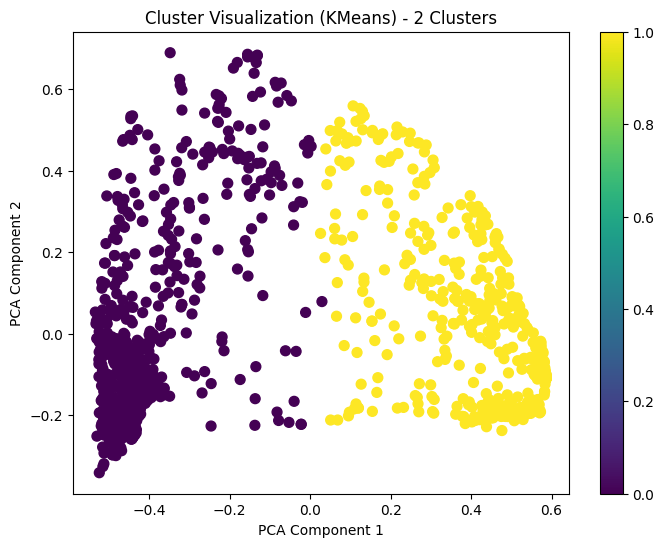

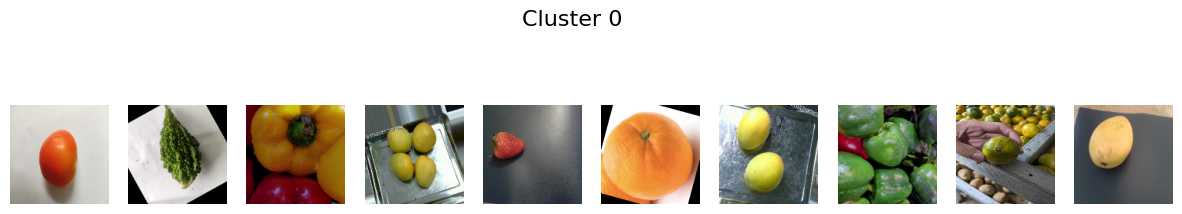

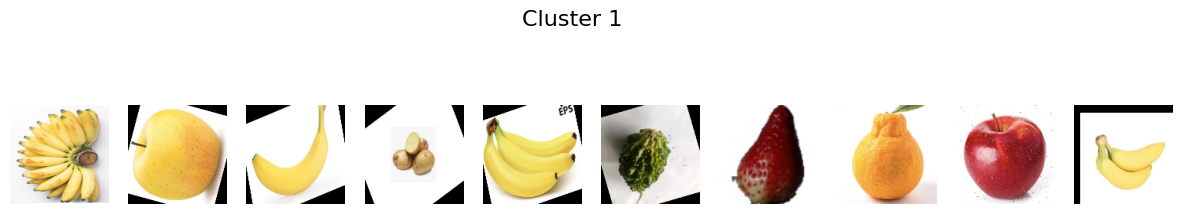

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

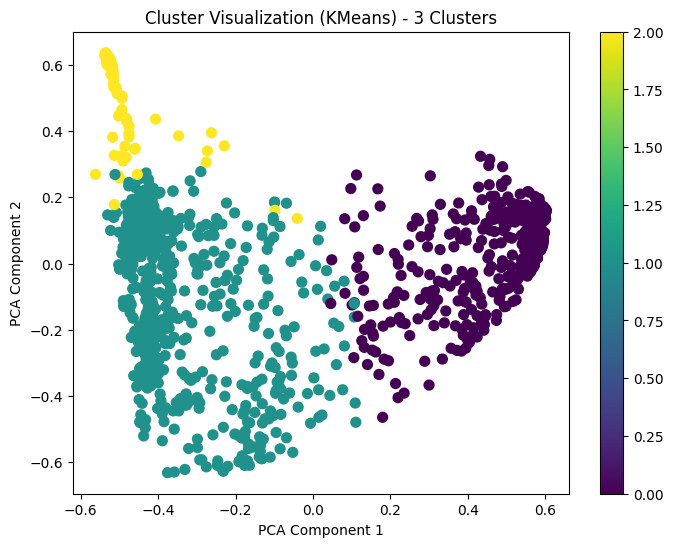

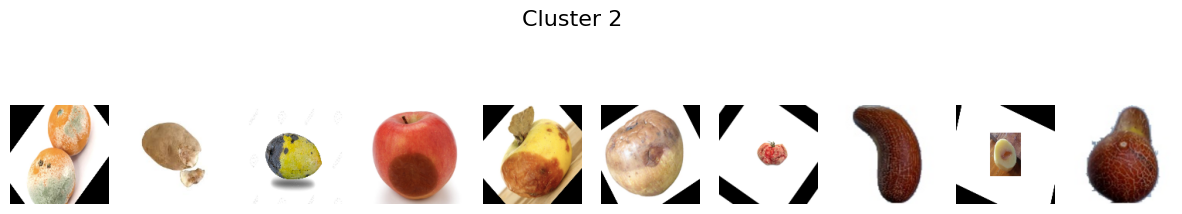

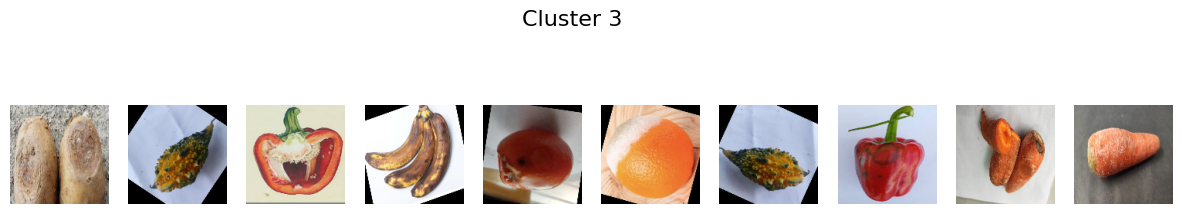

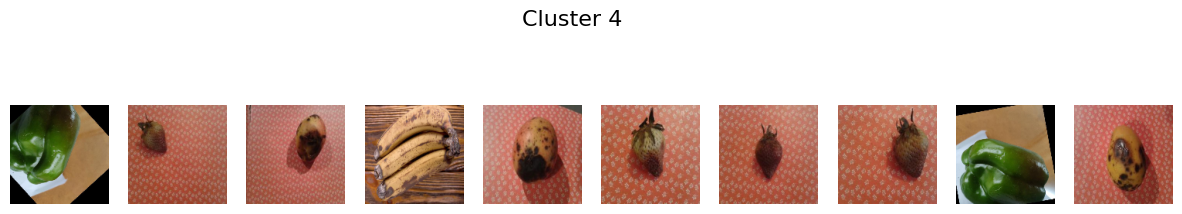

In [9]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# === SETTINGS ===
FRESH_DIR = '/kaggle/working/Clustering/Fresh'
ROTTEN_DIR = '/kaggle/working/Clustering/Rotten'
OUTPUT_DIR = '/kaggle/working/kmeans_clustered_images'
NUM_FRESH_CLUSTERS = 2
NUM_ROTTEN_CLUSTERS = 3
SAMPLES_PER_CLUSTER = 10

# === CREATE OUTPUT FOLDER ===
os.makedirs(OUTPUT_DIR, exist_ok=True)

# === FEATURE EXTRACTION ===
def extract_color_histogram(image, bins=(8, 8, 8)):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins, 
                        [0, 180, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

# === LOAD IMAGES & FEATURES ===
def load_images_and_features(folder):
    images = []
    features = []
    filenames = []
    for file in os.listdir(folder):
        if file.endswith(('.jpg', '.png', '.jpeg')):
            path = os.path.join(folder, file)
            img = cv2.imread(path)
            if img is not None:
                img_resized = cv2.resize(img, (128, 128))
                feat = extract_color_histogram(img_resized)
                features.append(feat)
                images.append(img_resized)
                filenames.append(file)  # save file name only
    return np.array(images), np.array(features), filenames

# === CLUSTERING FUNCTION ===
def cluster_and_visualize(images, features, filenames, n_clusters, cluster_offset):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(features)

    # PCA Visualization
    pca = PCA(n_components=2)
    features_pca = pca.fit_transform(features)

    plt.figure(figsize=(8, 6))
    plt.scatter(features_pca[:, 0], features_pca[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(f"Cluster Visualization (KMeans) - {n_clusters} Clusters")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.colorbar()
    plt.show()

    # Cluster images and save them
    for cluster_id in range(n_clusters):
        cluster_index = cluster_id + cluster_offset
        cluster_dir = os.path.join(OUTPUT_DIR, f"cluster_{cluster_index}")
        os.makedirs(cluster_dir, exist_ok=True)

        cluster_images = images[labels == cluster_id]
        cluster_files = np.array(filenames)[labels == cluster_id]

        # Save images
        for img, fname in zip(cluster_images, cluster_files):
            save_path = os.path.join(cluster_dir, fname)
            cv2.imwrite(save_path, img)

        # Plot the images of the cluster
        fig, axes = plt.subplots(1, min(SAMPLES_PER_CLUSTER, len(cluster_images)), figsize=(15, 3))
        fig.suptitle(f"Cluster {cluster_index}", fontsize=16)
        for i, ax in enumerate(axes):
            if i < len(cluster_images):
                ax.imshow(cv2.cvtColor(cluster_images[i], cv2.COLOR_BGR2RGB))
                ax.axis('off')
        plt.show()

# === RUNNING PIPELINE ===

# Fresh images
fresh_images, fresh_features, fresh_filenames = load_images_and_features(FRESH_DIR)
cluster_and_visualize(fresh_images, fresh_features, fresh_filenames, NUM_FRESH_CLUSTERS, cluster_offset=0)

# Rotten images
rotten_images, rotten_features, rotten_filenames = load_images_and_features(ROTTEN_DIR)
cluster_and_visualize(rotten_images, rotten_features, rotten_filenames, NUM_ROTTEN_CLUSTERS, cluster_offset=NUM_FRESH_CLUSTERS)

### 2. Agglomerative Clustering

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


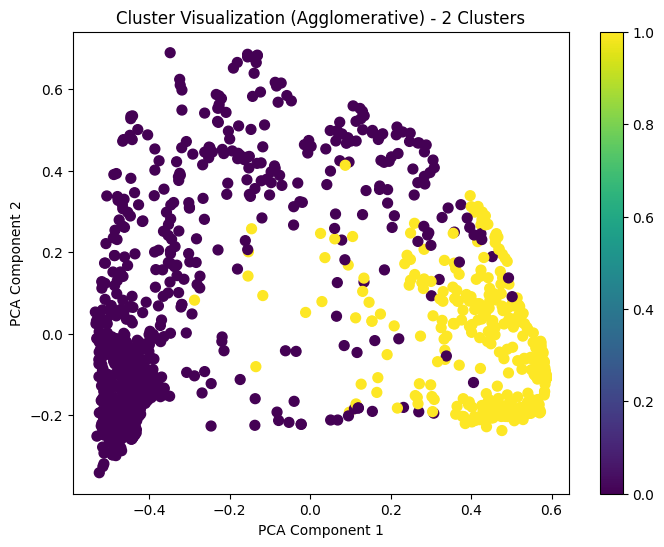

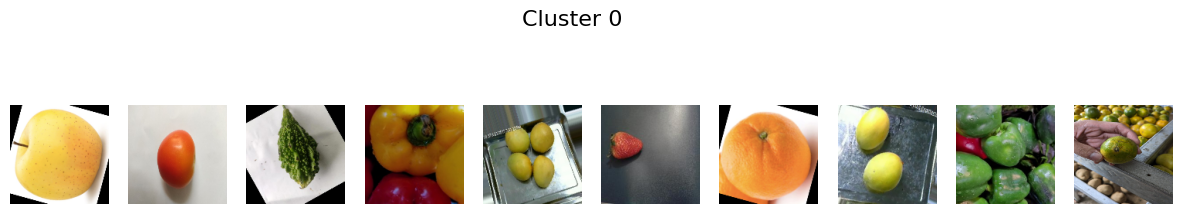

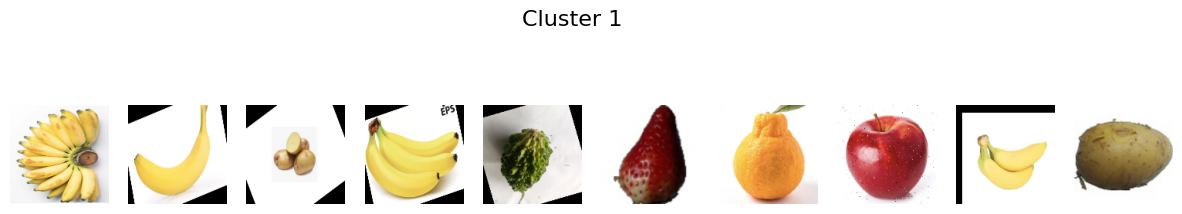

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

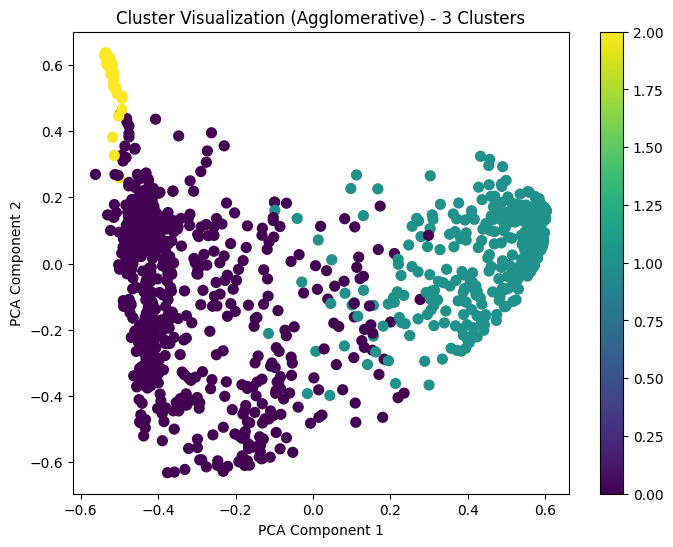

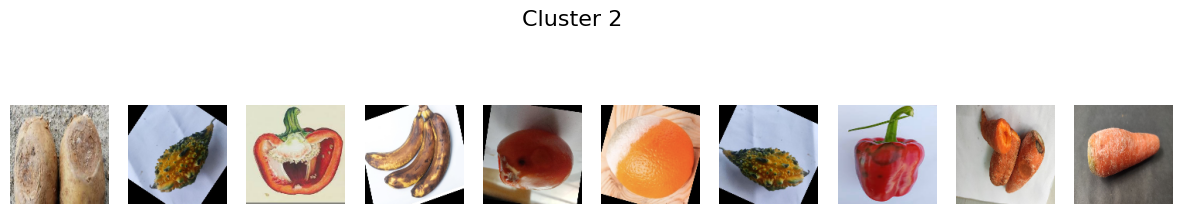

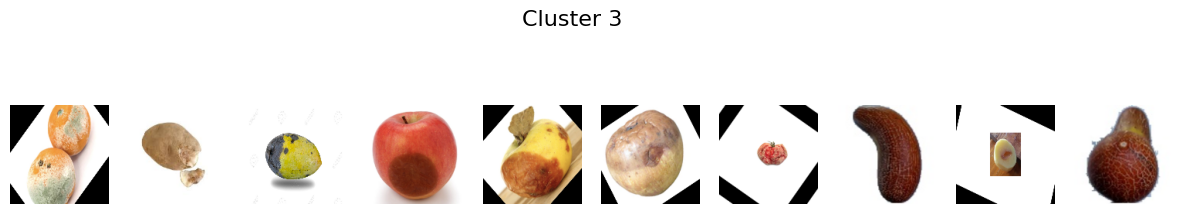

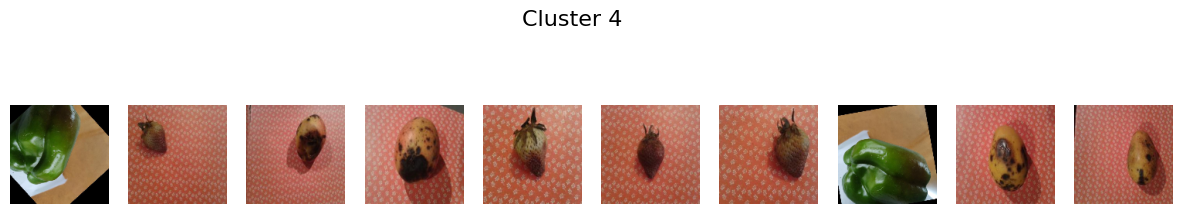

In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

# === SETTINGS ===
FRESH_DIR = '/kaggle/working/Clustering/Fresh'
ROTTEN_DIR = '/kaggle/working/Clustering/Rotten'
OUTPUT_DIR = '/kaggle/working/agglomerative_clustered_images'
NUM_FRESH_CLUSTERS = 2
NUM_ROTTEN_CLUSTERS = 3
SAMPLES_PER_CLUSTER = 10

# === CREATE OUTPUT FOLDER ===
os.makedirs(OUTPUT_DIR, exist_ok=True)

# === FEATURE EXTRACTION ===
def extract_color_histogram(image, bins=(8, 8, 8)):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins, 
                        [0, 180, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

# === LOAD IMAGES & FEATURES ===
def load_images_and_features(folder):
    images = []
    features = []
    filenames = []
    for file in os.listdir(folder):
        if file.endswith(('.jpg', '.png', '.jpeg')):
            path = os.path.join(folder, file)
            img = cv2.imread(path)
            if img is not None:
                img_resized = cv2.resize(img, (128, 128))
                feat = extract_color_histogram(img_resized)
                features.append(feat)
                images.append(img_resized)
                filenames.append(file)  # save file name only
    return np.array(images), np.array(features), filenames

# === AGGLOMERATIVE CLUSTERING FUNCTION ===
def cluster_and_visualize(images, features, filenames, n_clusters, cluster_offset):
    # Agglomerative Clustering
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agglomerative.fit_predict(features)

    # PCA Visualization
    pca = PCA(n_components=2)
    features_pca = pca.fit_transform(features)

    plt.figure(figsize=(8, 6))
    plt.scatter(features_pca[:, 0], features_pca[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(f"Cluster Visualization (Agglomerative) - {n_clusters} Clusters")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.colorbar()
    plt.show()

    # Cluster images and save them
    for cluster_id in range(n_clusters):
        cluster_index = cluster_id + cluster_offset
        cluster_dir = os.path.join(OUTPUT_DIR, f"cluster_{cluster_index}")
        os.makedirs(cluster_dir, exist_ok=True)

        cluster_images = images[labels == cluster_id]
        cluster_files = np.array(filenames)[labels == cluster_id]

        # Save images
        for img, fname in zip(cluster_images, cluster_files):
            save_path = os.path.join(cluster_dir, fname)
            cv2.imwrite(save_path, img)

        # Plot the images of the cluster
        fig, axes = plt.subplots(1, min(SAMPLES_PER_CLUSTER, len(cluster_images)), figsize=(15, 3))
        fig.suptitle(f"Cluster {cluster_index}", fontsize=16)
        for i, ax in enumerate(axes):
            if i < len(cluster_images):
                ax.imshow(cv2.cvtColor(cluster_images[i], cv2.COLOR_BGR2RGB))
                ax.axis('off')
        plt.show()

# === RUNNING PIPELINE ===

# Fresh images
fresh_images, fresh_features, fresh_filenames = load_images_and_features(FRESH_DIR)
cluster_and_visualize(fresh_images, fresh_features, fresh_filenames, NUM_FRESH_CLUSTERS, cluster_offset=0)

# Rotten images
rotten_images, rotten_features, rotten_filenames = load_images_and_features(ROTTEN_DIR)
cluster_and_visualize(rotten_images, rotten_features, rotten_filenames, NUM_ROTTEN_CLUSTERS, cluster_offset=NUM_FRESH_CLUSTERS)

### 3. DBSCAN

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


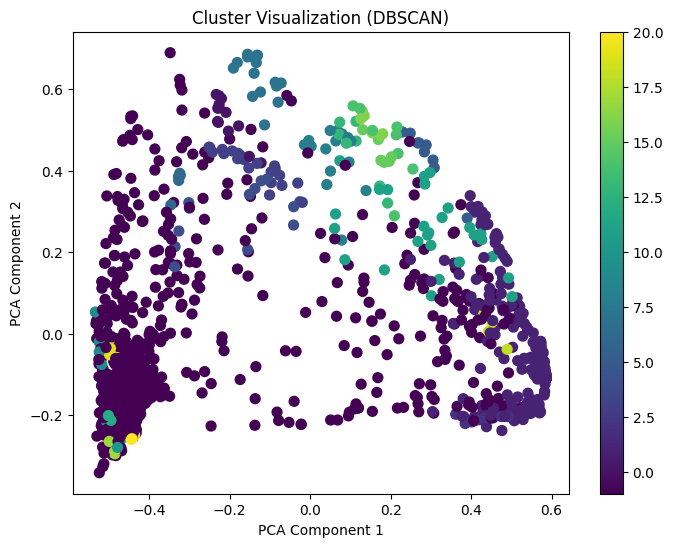

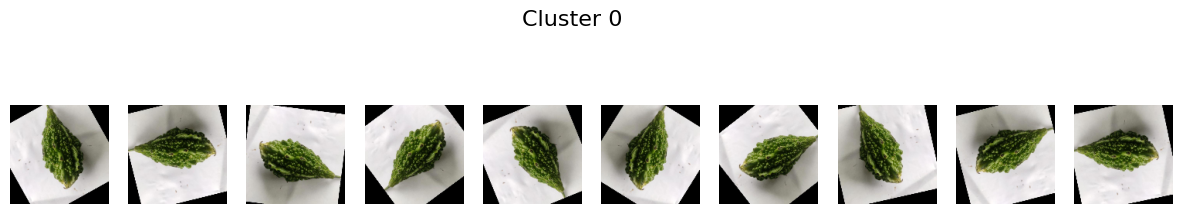

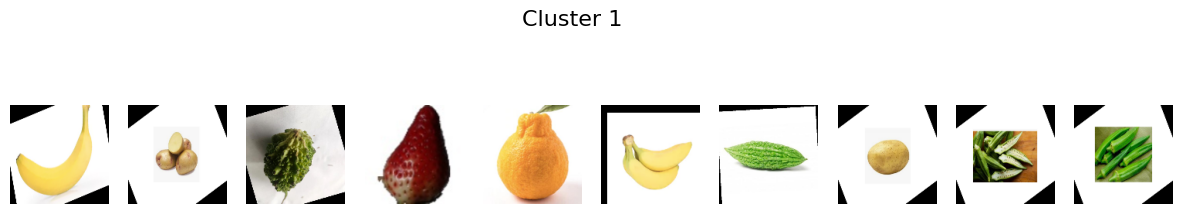

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

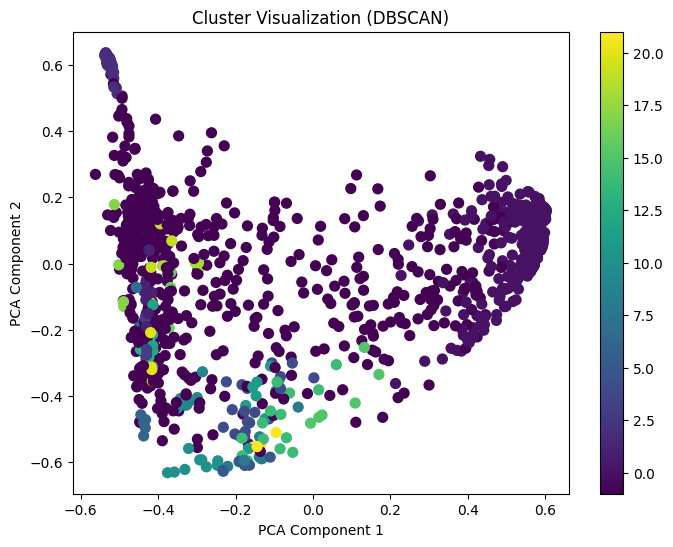

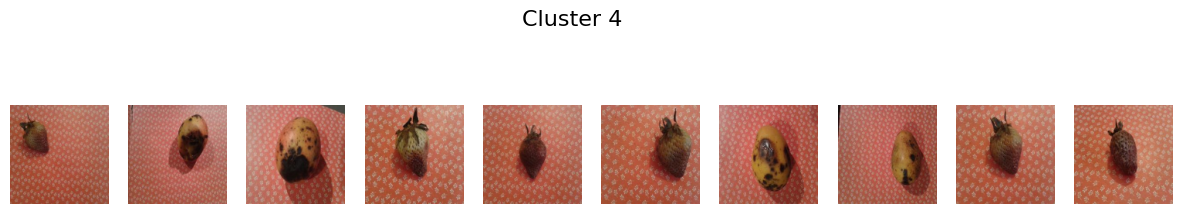

In [11]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# === SETTINGS ===
FRESH_DIR = '/kaggle/working/Clustering/Fresh'
ROTTEN_DIR = '/kaggle/working/Clustering/Rotten'
OUTPUT_DIR = '/kaggle/working/dbscan_clustered_images'
EPSILON = 0.3  # Maximum distance between two samples for one to be considered as in the neighborhood of the other
MIN_SAMPLES = 5  # The number of samples in a neighborhood for a point to be considered as a core point
SAMPLES_PER_CLUSTER = 10

# === CREATE OUTPUT FOLDER ===
os.makedirs(OUTPUT_DIR, exist_ok=True)

# === FEATURE EXTRACTION ===
def extract_color_histogram(image, bins=(8, 8, 8)):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins, 
                        [0, 180, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

# === LOAD IMAGES & FEATURES ===
def load_images_and_features(folder):
    images = []
    features = []
    filenames = []
    for file in os.listdir(folder):
        if file.endswith(('.jpg', '.png', '.jpeg')):
            path = os.path.join(folder, file)
            img = cv2.imread(path)
            if img is not None:
                img_resized = cv2.resize(img, (128, 128))
                feat = extract_color_histogram(img_resized)
                features.append(feat)
                images.append(img_resized)
                filenames.append(file)  # save file name only
    return np.array(images), np.array(features), filenames

# === DBSCAN CLUSTERING FUNCTION ===
def cluster_and_visualize(images, features, filenames, cluster_offset, n_clusters):
    # DBSCAN Clustering
    dbscan = DBSCAN(eps=EPSILON, min_samples=MIN_SAMPLES)
    labels = dbscan.fit_predict(features)

    # PCA Visualization
    pca = PCA(n_components=2)
    features_pca = pca.fit_transform(features)

    plt.figure(figsize=(8, 6))
    plt.scatter(features_pca[:, 0], features_pca[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(f"Cluster Visualization (DBSCAN)")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.colorbar()
    plt.show()

    # Cluster images and save them
    unique_labels = set(labels)
    cluster_count = 0  # Counter for cluster index
    for cluster_id in unique_labels:
        if cluster_id == -1:  # Points labeled as -1 are considered noise
            continue
        cluster_count += 1
        if cluster_count > n_clusters:  # Limit the number of clusters
            break
        
        cluster_index = cluster_id + cluster_offset
        cluster_dir = os.path.join(OUTPUT_DIR, f"cluster_{cluster_index}")
        os.makedirs(cluster_dir, exist_ok=True)

        cluster_images = images[labels == cluster_id]
        cluster_files = np.array(filenames)[labels == cluster_id]

        # Save images
        for img, fname in zip(cluster_images, cluster_files):
            save_path = os.path.join(cluster_dir, fname)
            cv2.imwrite(save_path, img)

        # Plot the images of the cluster
        fig, axes = plt.subplots(1, min(SAMPLES_PER_CLUSTER, len(cluster_images)), figsize=(15, 3))
        fig.suptitle(f"Cluster {cluster_index}", fontsize=16)
        for i, ax in enumerate(axes):
            if i < len(cluster_images):
                ax.imshow(cv2.cvtColor(cluster_images[i], cv2.COLOR_BGR2RGB))
                ax.axis('off')
        plt.show()

# === RUNNING PIPELINE ===

# Fresh images - clustering into 2 clusters
fresh_images, fresh_features, fresh_filenames = load_images_and_features(FRESH_DIR)
cluster_and_visualize(fresh_images, fresh_features, fresh_filenames, cluster_offset=0, n_clusters=2)

# Rotten images - clustering into 3 clusters
rotten_images, rotten_features, rotten_filenames = load_images_and_features(ROTTEN_DIR)
cluster_and_visualize(rotten_images, rotten_features, rotten_filenames, cluster_offset=2, n_clusters=3)

# Model Training using K Means Clustered Data

## Data Preparation for Model Training - Spliiting Data into Train, Test and Val
### Organizing Data into New Class Folders

In [12]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
dataset_dir = '/kaggle/working/kmeans_clustered_images'
train_dir = '/kaggle/working/K Means Model Data/train'
val_dir = '/kaggle/working/K Means Model Data/val'
test_dir = '/kaggle/working/K Means Model Data/test'

# Class names mapped from clusters
cluster_to_class = {
    'cluster_0': 'Fresh',
    'cluster_1': 'Slightly_Aged',
    'cluster_2': 'Stale',
    'cluster_3': 'Spoiled',
    'cluster_4': 'Rotten'
}

# Create directories for train, validation, and test splits
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Create subdirectories for each class
for cluster_name in cluster_to_class.values():
    os.makedirs(os.path.join(train_dir, cluster_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir, cluster_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, cluster_name), exist_ok=True)

# Move files to respective directories based on cluster
for cluster_folder in os.listdir(dataset_dir):
    cluster_path = os.path.join(dataset_dir, cluster_folder)
    
    if cluster_folder in cluster_to_class:
        # Get the new class name
        new_class = cluster_to_class[cluster_folder]
        
        images = os.listdir(cluster_path)
        
        # Split data into training, validation, and test
        train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
        val_images, test_images = train_test_split(test_images, test_size=0.5, random_state=42)  # Split remaining for validation

        # Move files to respective directories
        for image in train_images:
            shutil.move(os.path.join(cluster_path, image), os.path.join(train_dir, new_class, image))

        for image in val_images:
            shutil.move(os.path.join(cluster_path, image), os.path.join(val_dir, new_class, image))

        for image in test_images:
            shutil.move(os.path.join(cluster_path, image), os.path.join(test_dir, new_class, image))

print("✅ Data successfully split into train, validation, and test sets!")

✅ Data successfully split into train, validation, and test sets!


### Loading Data Using ImageDataGenerator

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# ImageDataGenerator setup for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, zoom_range=0.2)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from directory for training and validation sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

print("✅ Data loaded successfully!")

Found 2072 images belonging to 5 classes.
Found 259 images belonging to 5 classes.
Found 261 images belonging to 5 classes.
✅ Data loaded successfully!


## Models Trained :
1. VGG 16
2. VGG 19
3. MobileNet V2
4. ResNet50
5. DenseNet 121
6. InceptionV3
7. Xception
8. AlexNet

### Definition's of Clusters which will be used in Training and Predicting
* Cluster 0 - Fresh
* Cluster 1 - Slightly Aged
* Cluster 2 - Stale
* Cluster 3 - Spoiled
* Cluster 4 - Rotten

Training VGG16...


I0000 00:00:1744743791.237566      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1744743791.238224      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/200


I0000 00:00:1744743796.462201     135 service.cc:148] XLA service 0x7a9ec80042d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744743796.463282     135 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1744743796.463319     135 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1744743796.846088     135 cuda_dnn.cc:529] Loaded cuDNN version 90300


 2/65 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.2188 - loss: 2.0617  

I0000 00:00:1744743803.086304     135 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


65/65 ━━━━━━━━━━━━━━━━━━━━ 25s 235ms/step - accuracy: 0.2088 - loss: 1.9649 - val_accuracy: 0.2896 - val_loss: 1.4980
Epoch 2/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - accuracy: 0.2472 - loss: 1.6886 - val_accuracy: 0.4286 - val_loss: 1.4241
Epoch 3/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.2729 - loss: 1.5974 - val_accuracy: 0.4286 - val_loss: 1.3730
Epoch 4/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - accuracy: 0.3056 - loss: 1.5338 - val_accuracy: 0.4595 - val_loss: 1.3367
Epoch 5/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - accuracy: 0.3038 - loss: 1.5151 - val_accuracy: 0.4595 - val_loss: 1.3048
Epoch 6/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step - accuracy: 0.3574 - loss: 1.4540 - val_accuracy: 0.4788 - val_loss: 1.2782
Epoch 7/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - accuracy: 0.3864 - loss: 1.4133 - val_accuracy: 0.4942 - val_loss: 1.2561
Epoch 8/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - accuracy: 0.3527 - loss: 1.4026 - val_accuracy: 0.505

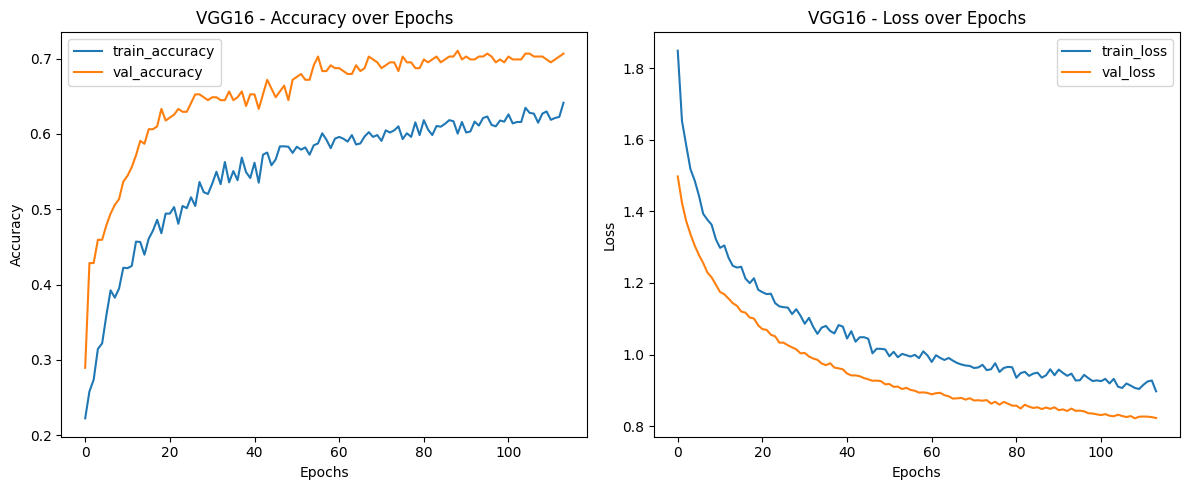

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step


✅ VGG16 - Training complete, confusion matrix and classification report saved.
Training VGG19...
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 15s 172ms/step - accuracy: 0.1895 - loss: 2.2640 - val_accuracy: 0.3900 - val_loss: 1.4502
Epoch 2/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.2764 - loss: 1.6953 - val_accuracy: 0.3861 - val_loss: 1.4188
Epoch 3/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.3164 - loss: 1.5814 - val_accuracy: 0.4170 - val_loss: 1.3922
Epoch 4/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.3011 - loss: 1.5695 - val_accuracy: 0.4556 - val_loss: 1.3570
Epoch 5/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step - accuracy: 0.3463 - loss: 1.5074 - val_accuracy: 0.4788 - val_loss: 1.3356
Epoch 6/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.3386 - loss: 1.4776 - val_accuracy: 0.4749 - val_loss: 1.3098
Epoch 7/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.3793 - los

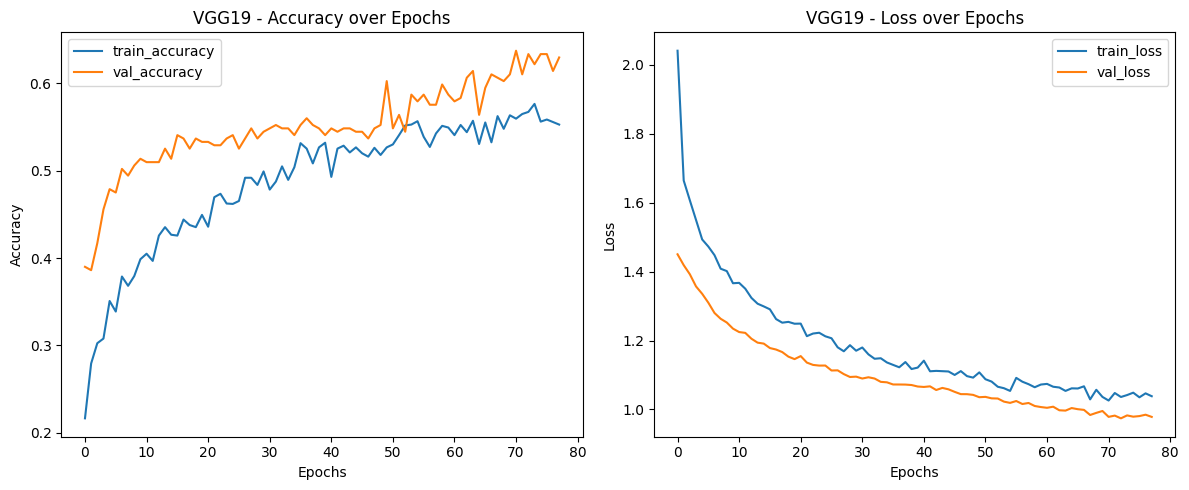

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step


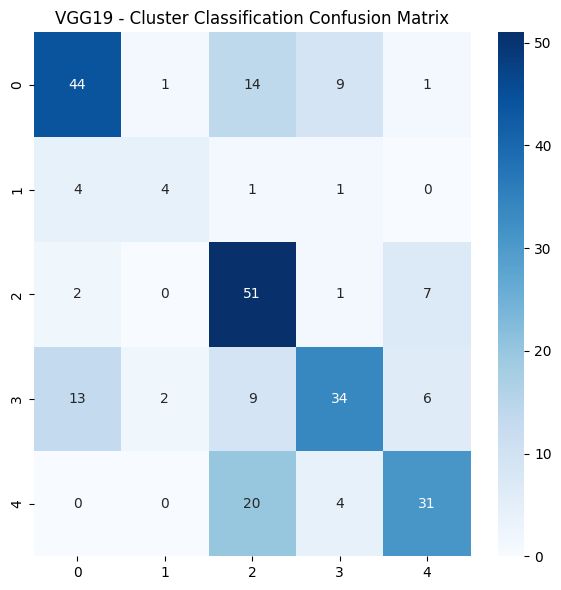

✅ VGG19 - Training complete, confusion matrix and classification report saved.
Training MobileNetV2...
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 29s 268ms/step - accuracy: 0.2242 - loss: 2.3982 - val_accuracy: 0.3784 - val_loss: 1.3801
Epoch 2/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - accuracy: 0.3420 - loss: 1.7718 - val_accuracy: 0.5405 - val_loss: 1.1588
Epoch 3/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 117ms/step - accuracy: 0.4227 - loss: 1.4798 - val_accuracy: 0.5869 - val_loss: 1.0807
Epoch 4/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 116ms/step - accuracy: 0.4801 - loss: 1.3084 - val_accuracy: 0.5985 - val_loss: 0.9970
Epoch 5/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 118ms/step - accuracy: 0.4869 - loss: 1.2872 - val_accuracy: 0.6371 - val_loss: 0.9561
Epoch 6/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 116ms/step - accuracy: 0.5234 - loss: 1.1389 - val_accuracy: 0.6448 - val_loss: 0.9229
Epoch 7/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 117ms/step - accuracy: 0.5565 -

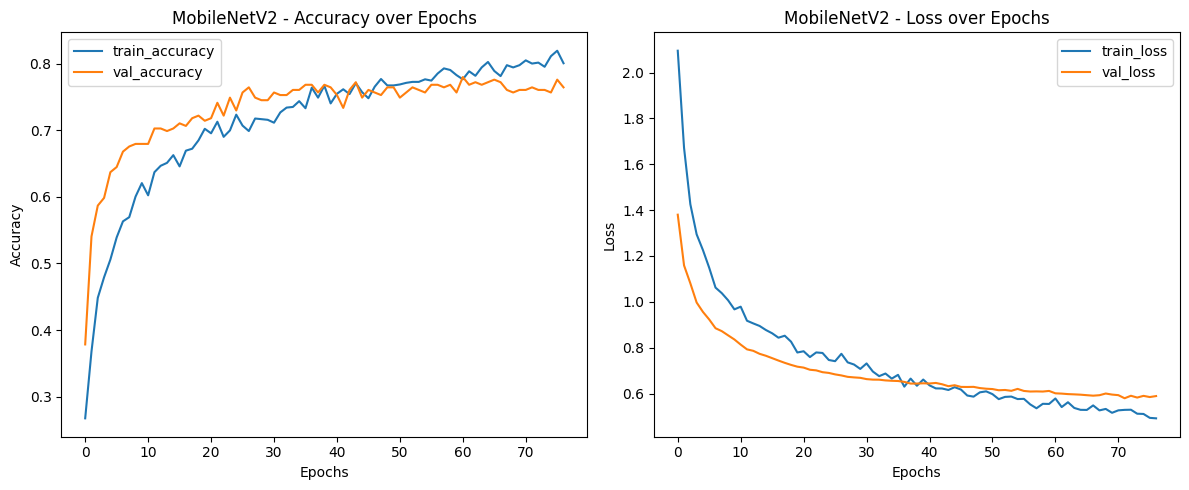

9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 400ms/step


✅ MobileNetV2 - Training complete, confusion matrix and classification report saved.
Training ResNet50...
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 35s 305ms/step - accuracy: 0.2452 - loss: 1.7727 - val_accuracy: 0.3089 - val_loss: 1.4806
Epoch 2/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.2455 - loss: 1.6965 - val_accuracy: 0.3320 - val_loss: 1.4536
Epoch 3/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step - accuracy: 0.2673 - loss: 1.6234 - val_accuracy: 0.3784 - val_loss: 1.4352
Epoch 4/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - accuracy: 0.2621 - loss: 1.6160 - val_accuracy: 0.3745 - val_loss: 1.4205
Epoch 5/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.2655 - loss: 1.5726 - val_accuracy: 0.4015 - val_loss: 1.4088
Epoch 6/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.2761 - loss: 1.5458 - val_accuracy: 0.4286 - val_loss: 1.3935
Epoch 7/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step - accuracy: 0.2

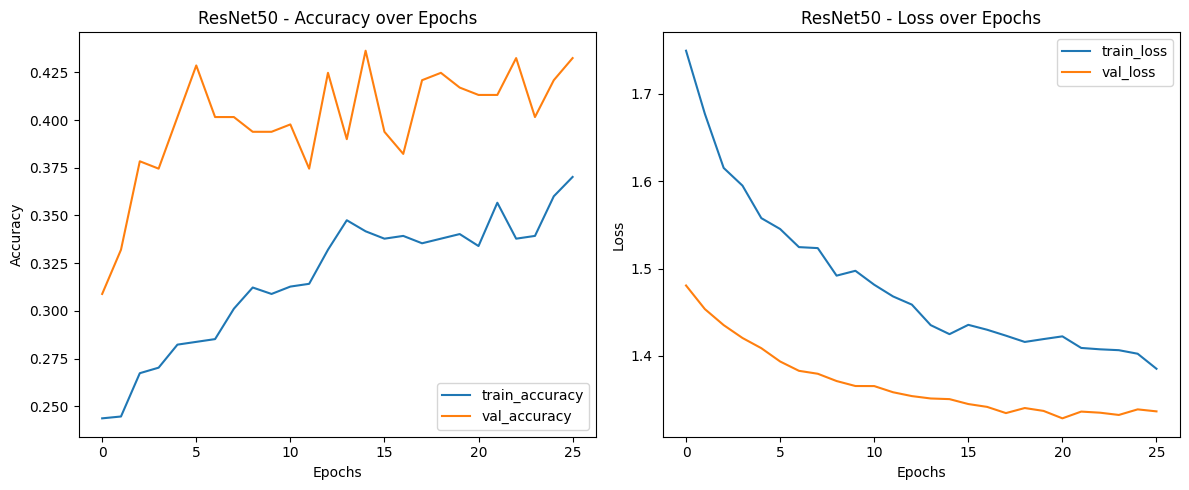

9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 516ms/step


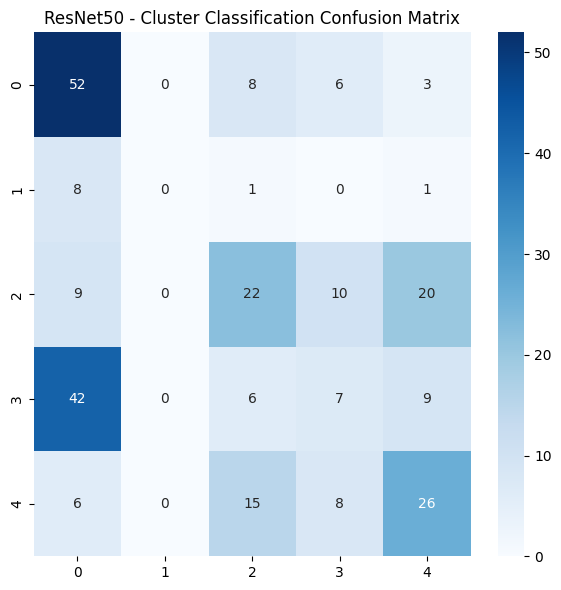

✅ ResNet50 - Training complete, confusion matrix and classification report saved.
Training DenseNet121...
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 69s 592ms/step - accuracy: 0.2294 - loss: 3.1077 - val_accuracy: 0.3822 - val_loss: 1.5407
Epoch 2/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.3070 - loss: 2.3855 - val_accuracy: 0.4286 - val_loss: 1.3303
Epoch 3/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.3661 - loss: 1.9667 - val_accuracy: 0.4710 - val_loss: 1.2246
Epoch 4/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - accuracy: 0.3981 - loss: 1.7223 - val_accuracy: 0.4942 - val_loss: 1.1567
Epoch 5/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.4169 - loss: 1.6438 - val_accuracy: 0.5290 - val_loss: 1.1112
Epoch 6/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.4399 - loss: 1.4641 - val_accuracy: 0.5328 - val_loss: 1.0817
Epoch 7/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.4

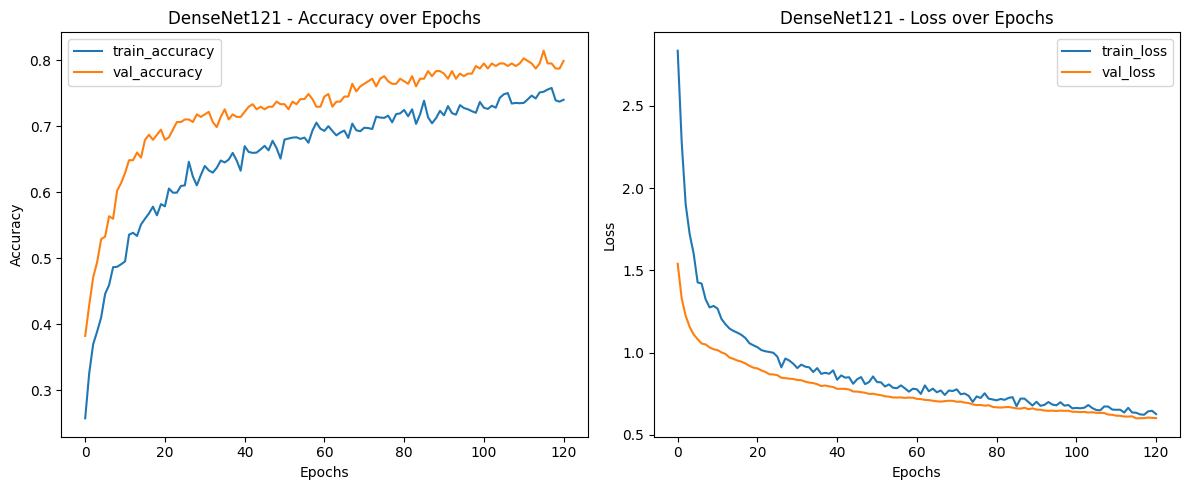

9/9 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step


✅ DenseNet121 - Training complete, confusion matrix and classification report saved.
Training InceptionV3...
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 46s 417ms/step - accuracy: 0.2401 - loss: 3.7799 - val_accuracy: 0.3822 - val_loss: 1.5294
Epoch 2/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - accuracy: 0.3339 - loss: 2.2627 - val_accuracy: 0.4865 - val_loss: 1.3126
Epoch 3/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - accuracy: 0.3740 - loss: 1.7712 - val_accuracy: 0.4981 - val_loss: 1.2968
Epoch 4/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - accuracy: 0.3654 - loss: 1.5828 - val_accuracy: 0.4749 - val_loss: 1.2946
Epoch 5/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - accuracy: 0.4187 - loss: 1.4577 - val_accuracy: 0.5405 - val_loss: 1.2705
Epoch 6/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.4313 - loss: 1.3808 - val_accuracy: 0.5560 - val_loss: 1.2325
Epoch 7/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - accuracy: 

9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 743ms/step


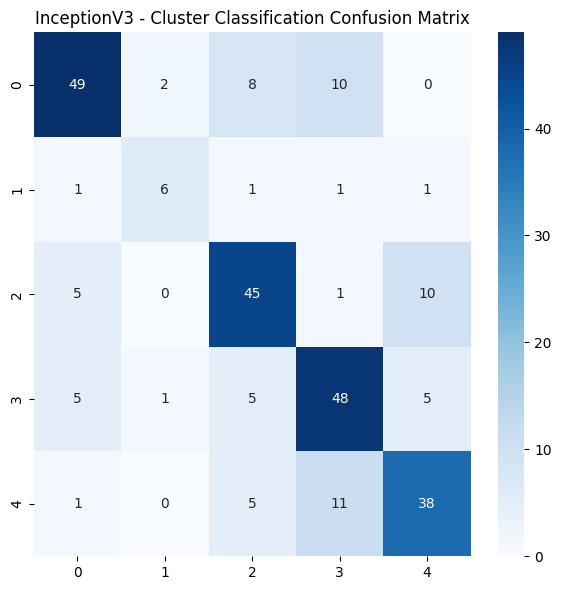

✅ InceptionV3 - Training complete, confusion matrix and classification report saved.
Training Xception...
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 30s 267ms/step - accuracy: 0.2525 - loss: 1.8229 - val_accuracy: 0.5135 - val_loss: 1.2620
Epoch 2/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - accuracy: 0.4233 - loss: 1.4129 - val_accuracy: 0.5946 - val_loss: 1.1212
Epoch 3/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step - accuracy: 0.4719 - loss: 1.2839 - val_accuracy: 0.6255 - val_loss: 1.0481
Epoch 4/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - accuracy: 0.5086 - loss: 1.1932 - val_accuracy: 0.6486 - val_loss: 0.9931
Epoch 5/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.5695 - loss: 1.0974 - val_accuracy: 0.6564 - val_loss: 0.9434
Epoch 6/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - accuracy: 0.5974 - loss: 1.0275 - val_accuracy: 0.6486 - val_loss: 0.9228
Epoch 7/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - accuracy: 0.6

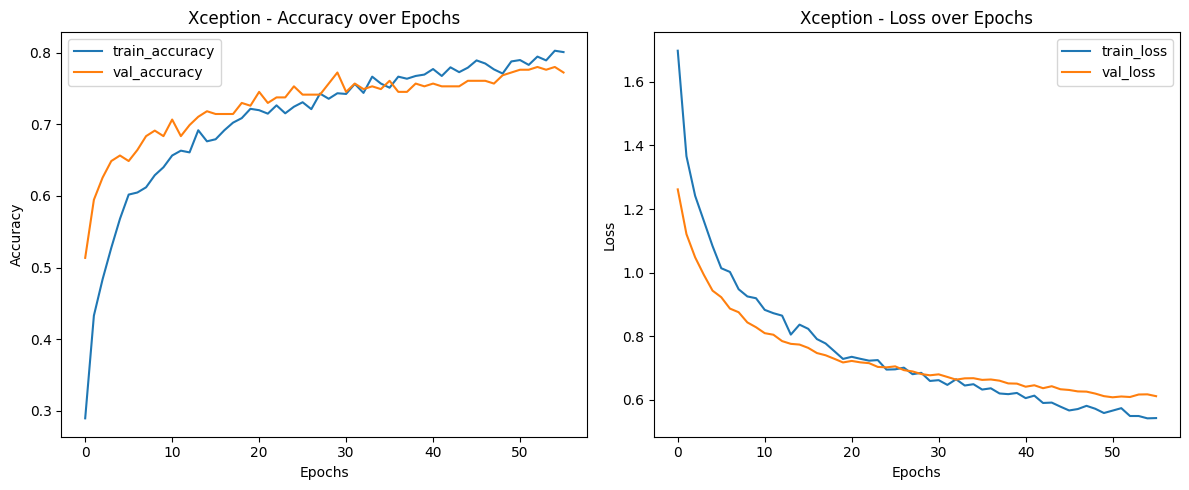

9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 386ms/step


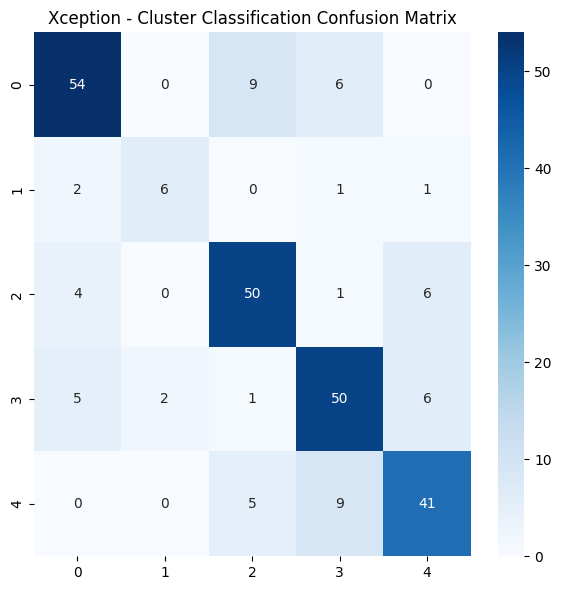

✅ Xception - Training complete, confusion matrix and classification report saved.
Training AlexNet...
Epoch 1/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 23s 219ms/step - accuracy: 0.2239 - loss: 1.5149 - val_accuracy: 0.3359 - val_loss: 1.3947
Epoch 2/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - accuracy: 0.3445 - loss: 1.3918 - val_accuracy: 0.4402 - val_loss: 1.2456
Epoch 3/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - accuracy: 0.3962 - loss: 1.3066 - val_accuracy: 0.4170 - val_loss: 1.2356
Epoch 4/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - accuracy: 0.4123 - loss: 1.1965 - val_accuracy: 0.4633 - val_loss: 1.1483
Epoch 5/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - accuracy: 0.4556 - loss: 1.1036 - val_accuracy: 0.5637 - val_loss: 0.9774
Epoch 6/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - accuracy: 0.5506 - loss: 0.9595 - val_accuracy: 0.5174 - val_loss: 1.2606
Epoch 7/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - accuracy: 0.5592 - loss: 0.9843 - val_accuracy: 0.6409 - val_lo

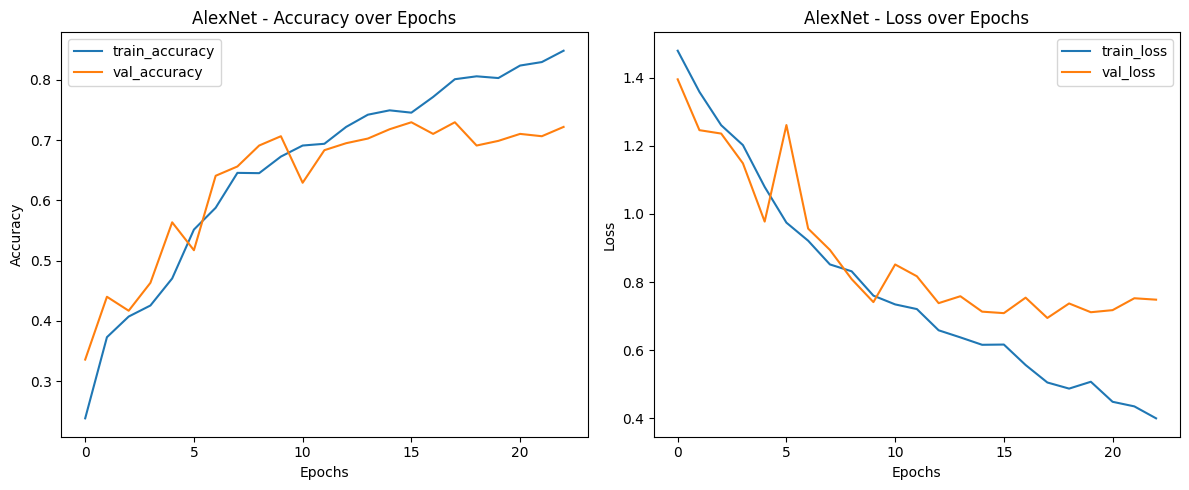

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


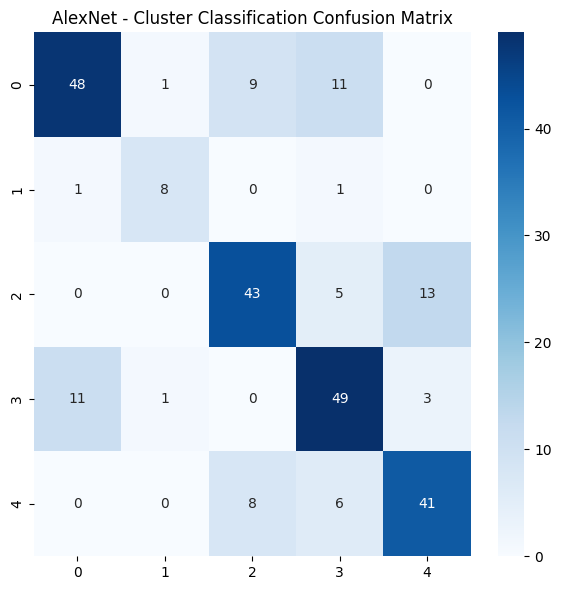

✅ AlexNet - Training complete, confusion matrix and classification report saved.
✅ All models trained, evaluated, and saved successfully!


In [14]:
import tensorflow as tf
from tensorflow.keras.applications import (
    VGG16, VGG19, MobileNetV2, ResNet50, DenseNet121, InceptionV3, Xception
)
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import os

# List of models
models = [
    ("VGG16", VGG16),
    ("VGG19", VGG19),
    ("MobileNetV2", MobileNetV2),
    ("ResNet50", ResNet50),
    ("DenseNet121", DenseNet121),
    ("InceptionV3", InceptionV3),
    ("Xception", Xception),
    ("AlexNet", None)  # Placeholder for custom AlexNet
]

# Custom AlexNet Model
def create_alexnet_model(input_shape=(128, 128, 3), num_classes=5):
    model = Sequential()

    model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax', name='cluster_output'))

    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Function to create each pre-trained model
def create_model(base_model_fn, input_shape=(128, 128, 3), num_classes=5):
    base_model = base_model_fn(include_top=False, weights='imagenet', input_shape=input_shape)
    base_model.trainable = False
    
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)

    cluster_output = Dense(num_classes, activation='softmax', name='cluster_output')(x)

    model = Model(inputs=base_model.input, outputs=[cluster_output])
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Ensure necessary folders exist
os.makedirs("/kaggle/working/kmeans_saved_models", exist_ok=True)
os.makedirs("/kaggle/working/kmeans_plots", exist_ok=True)
os.makedirs("/kaggle/working/kmeans_confusion_matrices", exist_ok=True)
os.makedirs("/kaggle/working/kmeans_classification_reports", exist_ok=True)

# Loop to train and evaluate all models
for model_name, model_fn in models:
    print(f"Training {model_name}...")
    
    # Create model
    if model_name == "AlexNet":
        model = create_alexnet_model()
    else:
        model = create_model(model_fn)

    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    checkpoint = ModelCheckpoint(f"/kaggle/working/kmeans_saved_models/{model_name}_best_model.keras",monitor='val_loss', save_best_only=True, mode='min')

    history = model.fit(
        train_generator,
        epochs=200,
        validation_data=val_generator,
        callbacks=[early_stop, checkpoint]
    )

    model.save(f"/kaggle/working/kmeans_saved_models/{model_name}_model.keras")

    # Plot Accuracy and Loss graphs
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title(f'{model_name} - Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(f'{model_name} - Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig(f"/kaggle/working/kmeans_plots/{model_name}_accuracy_loss_plot.png")
    plt.show()

    val_pred = model.predict(val_generator)
    val_labels = val_generator.classes
    cluster_preds = val_pred.argmax(axis=1)

    cluster_cm = confusion_matrix(val_labels, cluster_preds)
    target_names = list(train_generator.class_indices.keys())
    cluster_report = classification_report(val_labels, cluster_preds, target_names=target_names)


    plt.figure(figsize=(6, 6))
    sns.heatmap(cluster_cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Cluster Classification Confusion Matrix')
    plt.tight_layout()
    plt.savefig(f"/kaggle/working/kmeans_confusion_matrices/{model_name}_confusion_matrix.png")
    plt.show()

    with open(f"/kaggle/working/kmeans_classification_reports/{model_name}_classification_report.txt", "w") as f:
        f.write("Cluster Classification Report:\n")
        f.write(cluster_report)

    print(f"✅ {model_name} - Training complete, confusion matrix and classification report saved.")

print("✅ All models trained, evaluated, and saved successfully!")

In [15]:
import shutil
shutil.make_archive('/kaggle/working/kmeans_model_outputs', 'zip', '/kaggle/working')

'/kaggle/working/kmeans_model_outputs.zip'

# Model Training using Agglomerative Clustered Data

## Data Preparation for Model Training - Spliiting Data into Train, Test and Val
### Organizing Data into New Class Folders

In [16]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
dataset_dir = '/kaggle/working/agglomerative_clustered_images'
train_dir = '/kaggle/working/Agglomerative Model Data/train'
val_dir = '/kaggle/working/Agglomerative Model Data/val'
test_dir = '/kaggle/working/Agglomerative Model Data/test'

# Class names mapped from clusters
cluster_to_class = {
    'cluster_0': 'Fresh',
    'cluster_1': 'Slightly_Aged',
    'cluster_2': 'Stale',
    'cluster_3': 'Spoiled',
    'cluster_4': 'Rotten'
}

# Create directories for train, validation, and test splits
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Create subdirectories for each class
for cluster_name in cluster_to_class.values():
    os.makedirs(os.path.join(train_dir, cluster_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir, cluster_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, cluster_name), exist_ok=True)

# Move files to respective directories based on cluster
for cluster_folder in os.listdir(dataset_dir):
    cluster_path = os.path.join(dataset_dir, cluster_folder)
    
    if cluster_folder in cluster_to_class:
        # Get the new class name
        new_class = cluster_to_class[cluster_folder]
        
        images = os.listdir(cluster_path)
        
        # Split data into training, validation, and test
        train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
        val_images, test_images = train_test_split(test_images, test_size=0.5, random_state=42)  # Split remaining for validation

        # Move files to respective directories
        for image in train_images:
            shutil.move(os.path.join(cluster_path, image), os.path.join(train_dir, new_class, image))

        for image in val_images:
            shutil.move(os.path.join(cluster_path, image), os.path.join(val_dir, new_class, image))

        for image in test_images:
            shutil.move(os.path.join(cluster_path, image), os.path.join(test_dir, new_class, image))

print("✅ Data successfully split into train, validation, and test sets!")

✅ Data successfully split into train, validation, and test sets!


### Loading Data Using ImageDataGenerator

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# ImageDataGenerator setup for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, zoom_range=0.2)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from directory for training and validation sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

print("✅ Data loaded successfully!")

Found 2071 images belonging to 5 classes.
Found 259 images belonging to 5 classes.
Found 262 images belonging to 5 classes.
✅ Data loaded successfully!


## Models Trained :
1. VGG 16
2. VGG 19
3. MobileNet V2
4. ResNet50
5. DenseNet 121
6. InceptionV3
7. Xception
8. AlexNet

### Definition's of Clusters which will be used in Training and Predicting
* Cluster 0 - Fresh
* Cluster 1 - Slightly Aged
* Cluster 2 - Stale
* Cluster 3 - Spoiled
* Cluster 4 - Rotten

Training VGG16...
Epoch 1/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 18s 214ms/step - accuracy: 0.1716 - loss: 2.3526 - val_accuracy: 0.2896 - val_loss: 1.5622
Epoch 2/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - accuracy: 0.2821 - loss: 1.7219 - val_accuracy: 0.3243 - val_loss: 1.4558
Epoch 3/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - accuracy: 0.2743 - loss: 1.6227 - val_accuracy: 0.3668 - val_loss: 1.4121
Epoch 4/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - accuracy: 0.3189 - loss: 1.5426 - val_accuracy: 0.3745 - val_loss: 1.3682
Epoch 5/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - accuracy: 0.3453 - loss: 1.4682 - val_accuracy: 0.3977 - val_loss: 1.3331
Epoch 6/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - accuracy: 0.3578 - loss: 1.4593 - val_accuracy: 0.4286 - val_loss: 1.3017
Epoch 7/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - accuracy: 0.3583 - loss: 1.4039 - val_accuracy: 0.4324 - val_loss: 1.2752
Epoch 8/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - accuracy: 0.3863 - loss

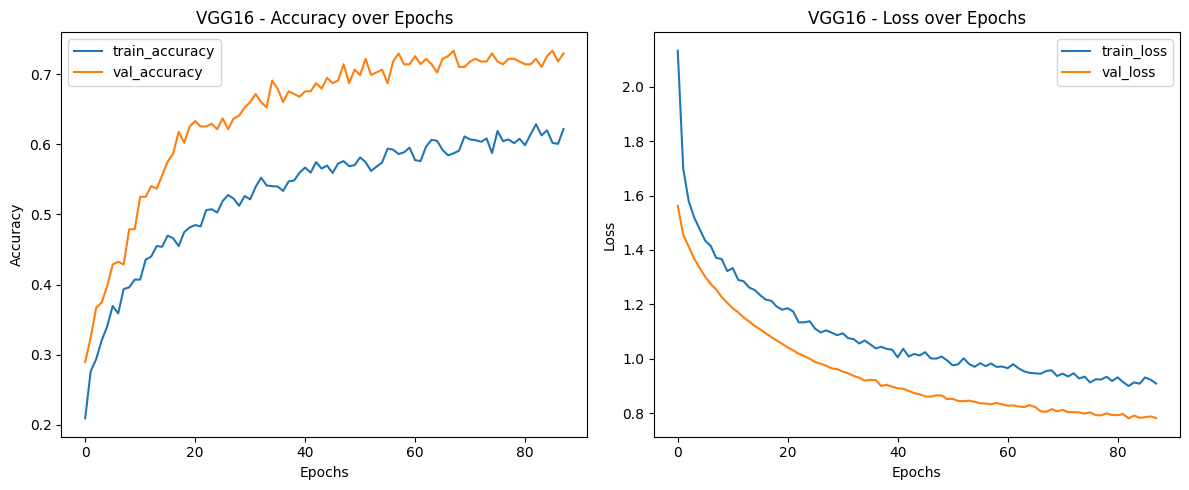

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step


✅ VGG16 - Training complete, confusion matrix and classification report saved.
Training VGG19...
Epoch 1/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 15s 173ms/step - accuracy: 0.2638 - loss: 1.9001 - val_accuracy: 0.3089 - val_loss: 1.4663
Epoch 2/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - accuracy: 0.2670 - loss: 1.6573 - val_accuracy: 0.3707 - val_loss: 1.4296
Epoch 3/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.2832 - loss: 1.6171 - val_accuracy: 0.3900 - val_loss: 1.4021
Epoch 4/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - accuracy: 0.2949 - loss: 1.5605 - val_accuracy: 0.4054 - val_loss: 1.3679
Epoch 5/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.3200 - loss: 1.5216 - val_accuracy: 0.3938 - val_loss: 1.3389
Epoch 6/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.3073 - loss: 1.4808 - val_accuracy: 0.4131 - val_loss: 1.3173
Epoch 7/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step - accuracy: 0.3291 - loss: 1.4379 - val_accuracy: 0.4170 - val_loss: 1.301

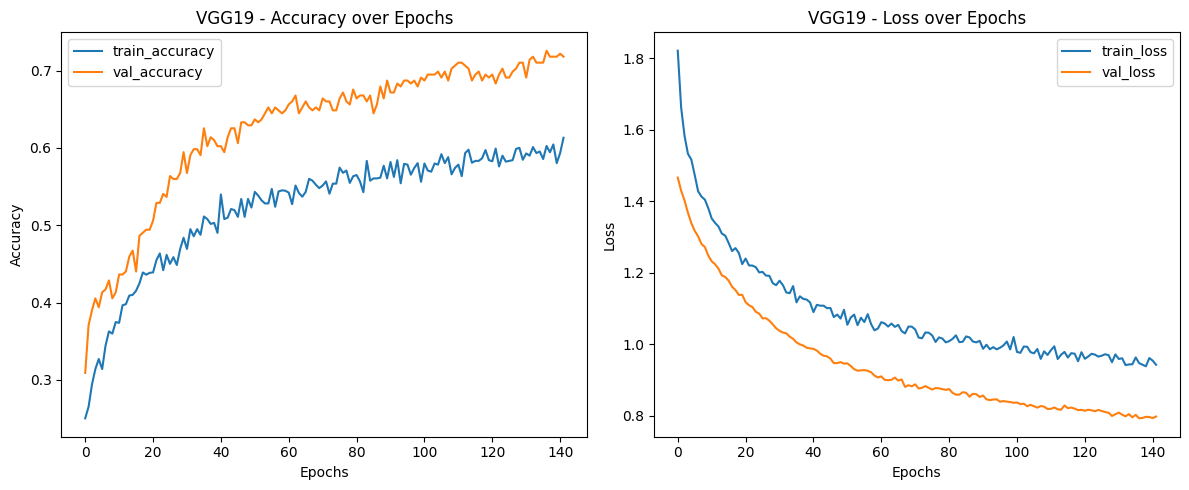

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step


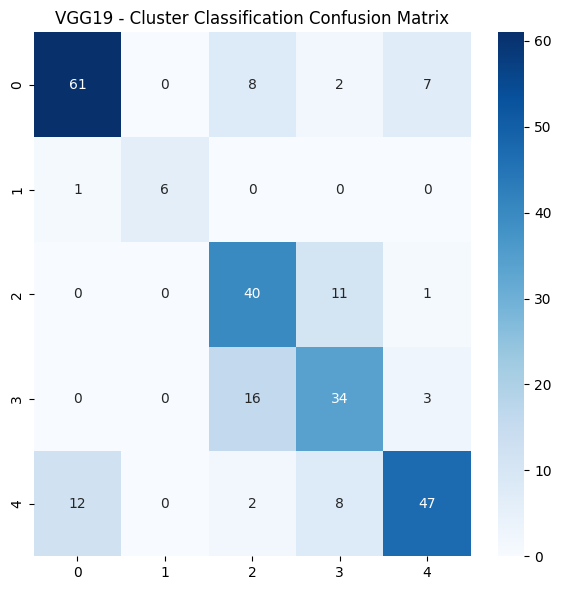

✅ VGG19 - Training complete, confusion matrix and classification report saved.
Training MobileNetV2...
Epoch 1/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 27s 260ms/step - accuracy: 0.2678 - loss: 2.2523 - val_accuracy: 0.4402 - val_loss: 1.2954
Epoch 2/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - accuracy: 0.3715 - loss: 1.7020 - val_accuracy: 0.5637 - val_loss: 1.1077
Epoch 3/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - accuracy: 0.4354 - loss: 1.4464 - val_accuracy: 0.5830 - val_loss: 1.0079
Epoch 4/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 116ms/step - accuracy: 0.4872 - loss: 1.2882 - val_accuracy: 0.6448 - val_loss: 0.9309
Epoch 5/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - accuracy: 0.5380 - loss: 1.1599 - val_accuracy: 0.6718 - val_loss: 0.8907
Epoch 6/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - accuracy: 0.5406 - loss: 1.1503 - val_accuracy: 0.6873 - val_loss: 0.8641
Epoch 7/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - accuracy: 0.5845 - loss: 1.0489 - val_accuracy: 0.6834 - val_loss: 

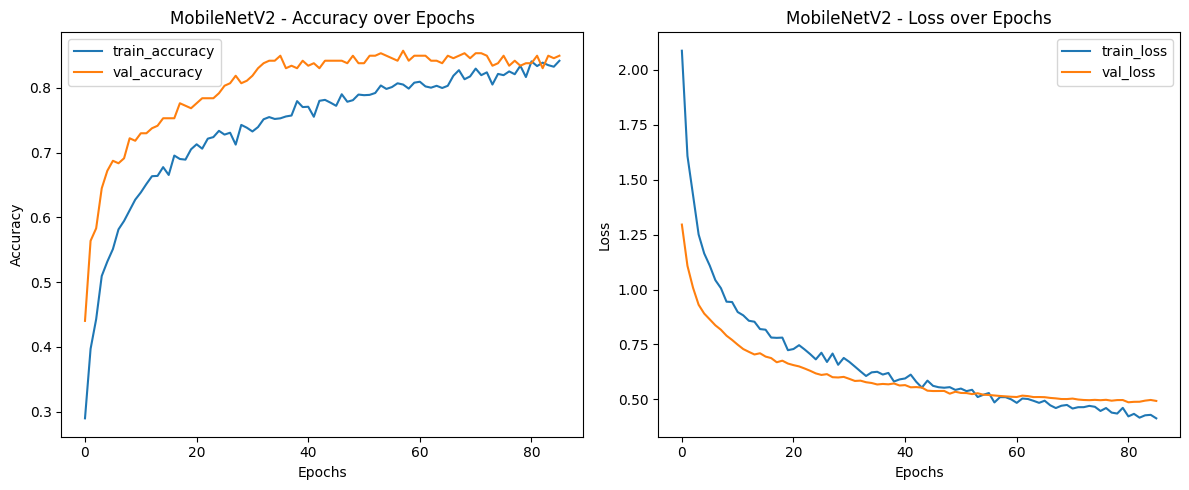

9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 460ms/step


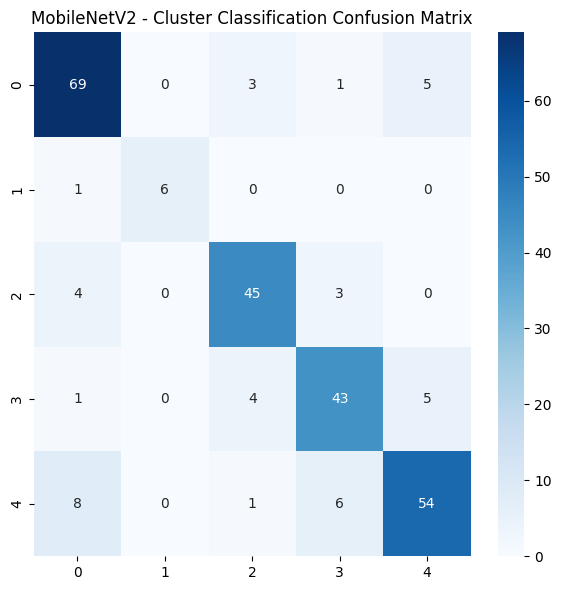

✅ MobileNetV2 - Training complete, confusion matrix and classification report saved.
Training ResNet50...
Epoch 1/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 33s 298ms/step - accuracy: 0.2583 - loss: 1.7375 - val_accuracy: 0.3282 - val_loss: 1.4794
Epoch 2/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - accuracy: 0.2506 - loss: 1.6389 - val_accuracy: 0.4015 - val_loss: 1.4444
Epoch 3/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 133ms/step - accuracy: 0.2929 - loss: 1.5598 - val_accuracy: 0.3938 - val_loss: 1.4209
Epoch 4/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - accuracy: 0.2890 - loss: 1.5254 - val_accuracy: 0.3977 - val_loss: 1.4070
Epoch 5/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - accuracy: 0.2928 - loss: 1.5321 - val_accuracy: 0.3552 - val_loss: 1.3915
Epoch 6/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.2857 - loss: 1.4803 - val_accuracy: 0.4286 - val_loss: 1.3818
Epoch 7/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.2869 - loss: 1.4813 - val_accuracy: 0.4247 - val_lo

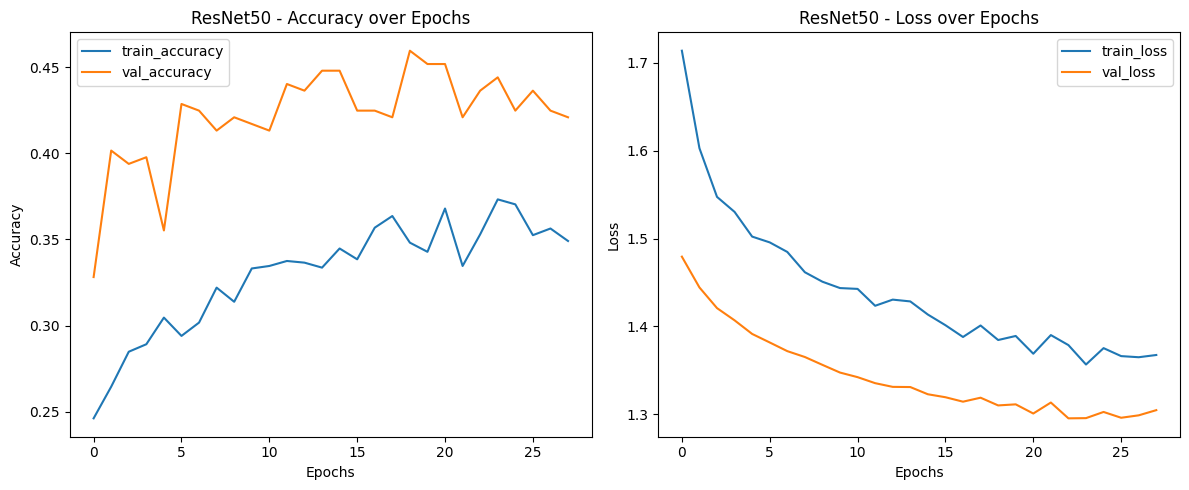

9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 515ms/step


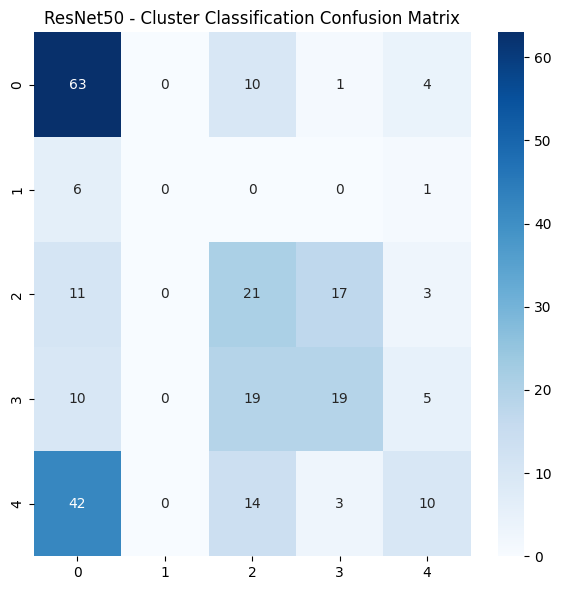

✅ ResNet50 - Training complete, confusion matrix and classification report saved.
Training DenseNet121...
Epoch 1/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 62s 540ms/step - accuracy: 0.1997 - loss: 3.2872 - val_accuracy: 0.3475 - val_loss: 1.6142
Epoch 2/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step - accuracy: 0.3228 - loss: 2.2879 - val_accuracy: 0.4788 - val_loss: 1.3177
Epoch 3/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - accuracy: 0.3445 - loss: 2.1018 - val_accuracy: 0.5328 - val_loss: 1.1885
Epoch 4/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - accuracy: 0.3869 - loss: 1.6761 - val_accuracy: 0.6100 - val_loss: 1.0986
Epoch 5/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - accuracy: 0.4279 - loss: 1.5170 - val_accuracy: 0.6332 - val_loss: 1.0503
Epoch 6/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.4334 - loss: 1.4746 - val_accuracy: 0.6602 - val_loss: 1.0176
Epoch 7/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - accuracy: 0.4734 - loss: 1.3757 - val_accuracy: 0.6564 - val_lo

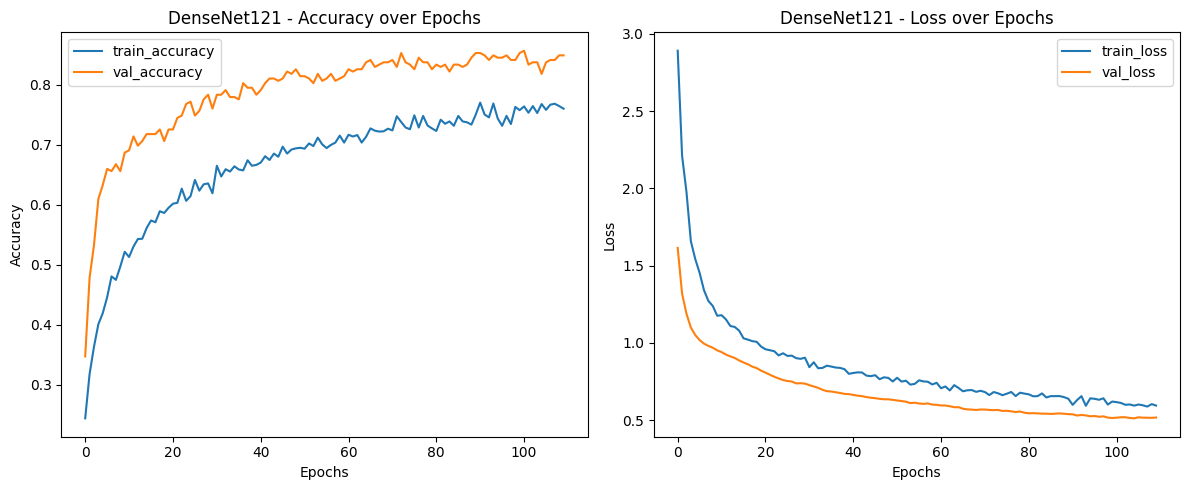

9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step


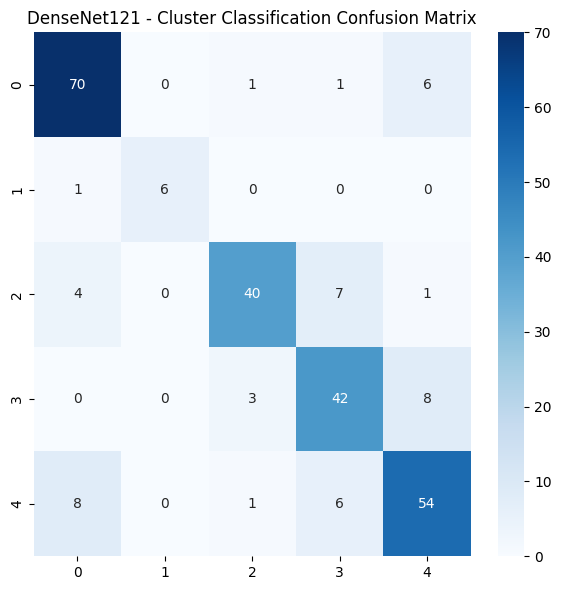

✅ DenseNet121 - Training complete, confusion matrix and classification report saved.
Training InceptionV3...
Epoch 1/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 41s 380ms/step - accuracy: 0.2369 - loss: 3.5360 - val_accuracy: 0.3977 - val_loss: 1.5889
Epoch 2/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - accuracy: 0.3329 - loss: 2.0829 - val_accuracy: 0.4131 - val_loss: 1.3622
Epoch 3/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - accuracy: 0.3600 - loss: 1.6897 - val_accuracy: 0.4324 - val_loss: 1.3237
Epoch 4/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - accuracy: 0.4098 - loss: 1.4608 - val_accuracy: 0.5097 - val_loss: 1.2982
Epoch 5/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - accuracy: 0.4119 - loss: 1.4429 - val_accuracy: 0.5328 - val_loss: 1.2462
Epoch 6/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - accuracy: 0.4622 - loss: 1.3292 - val_accuracy: 0.5676 - val_loss: 1.2321
Epoch 7/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - accuracy: 0.4498 - loss: 1.3089 - val_accuracy: 0.5714 - va

9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 740ms/step


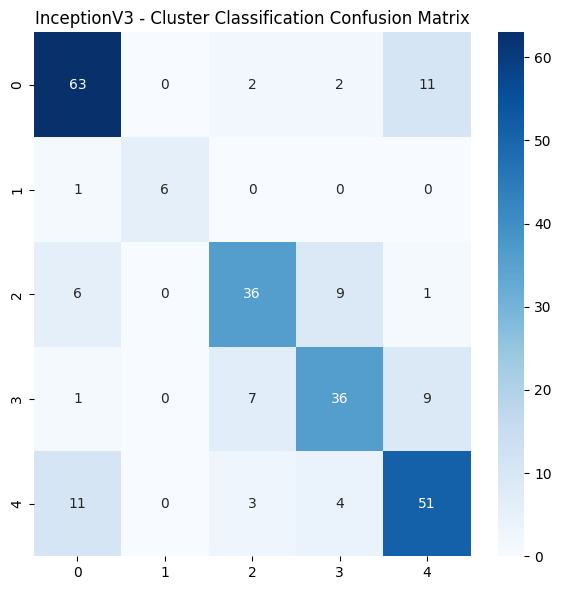

✅ InceptionV3 - Training complete, confusion matrix and classification report saved.
Training Xception...
Epoch 1/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 27s 259ms/step - accuracy: 0.2868 - loss: 1.7586 - val_accuracy: 0.4286 - val_loss: 1.2584
Epoch 2/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.3807 - loss: 1.4612 - val_accuracy: 0.5637 - val_loss: 1.1033
Epoch 3/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - accuracy: 0.4545 - loss: 1.2584 - val_accuracy: 0.6178 - val_loss: 1.0078
Epoch 4/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 126ms/step - accuracy: 0.5593 - loss: 1.1077 - val_accuracy: 0.6602 - val_loss: 0.9320
Epoch 5/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - accuracy: 0.5774 - loss: 1.0554 - val_accuracy: 0.6680 - val_loss: 0.8747
Epoch 6/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 126ms/step - accuracy: 0.6234 - loss: 0.9535 - val_accuracy: 0.6795 - val_loss: 0.8442
Epoch 7/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - accuracy: 0.6008 - loss: 0.9718 - val_accuracy: 0.7027 - val_los

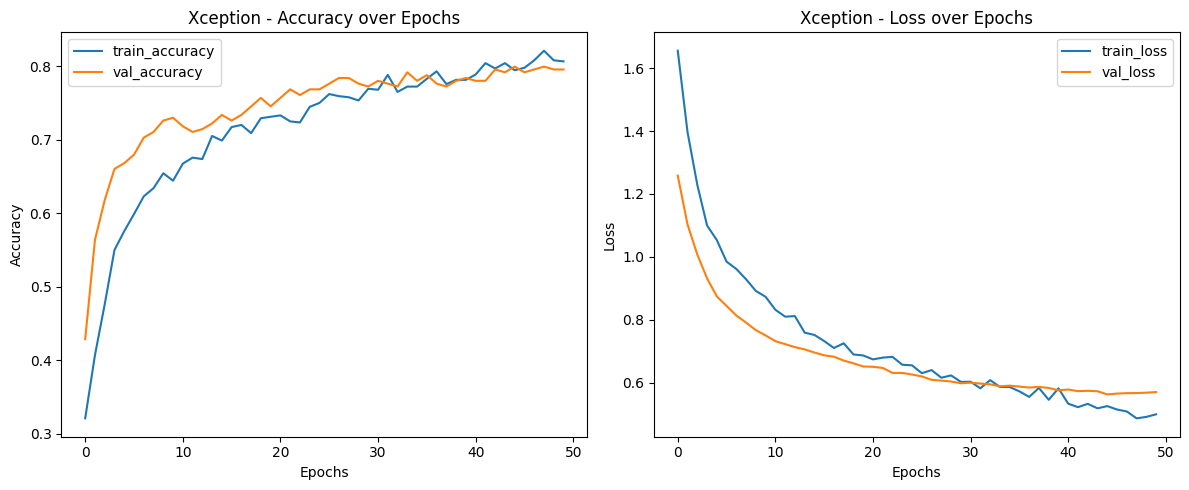

9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 578ms/step


✅ Xception - Training complete, confusion matrix and classification report saved.
Training AlexNet...
Epoch 1/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 20s 185ms/step - accuracy: 0.2490 - loss: 1.5041 - val_accuracy: 0.2162 - val_loss: 1.4478
Epoch 2/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - accuracy: 0.2825 - loss: 1.4261 - val_accuracy: 0.4247 - val_loss: 1.3050
Epoch 3/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - accuracy: 0.3975 - loss: 1.3027 - val_accuracy: 0.4363 - val_loss: 1.1265
Epoch 4/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - accuracy: 0.4448 - loss: 1.1567 - val_accuracy: 0.4826 - val_loss: 1.0230
Epoch 5/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - accuracy: 0.4841 - loss: 1.0682 - val_accuracy: 0.4903 - val_loss: 1.0655
Epoch 6/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 141ms/step - accuracy: 0.5107 - loss: 0.9894 - val_accuracy: 0.4942 - val_loss: 1.0011
Epoch 7/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - accuracy: 0.5391 - loss: 0.9288 - val_accuracy: 0.4749 - val_los

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


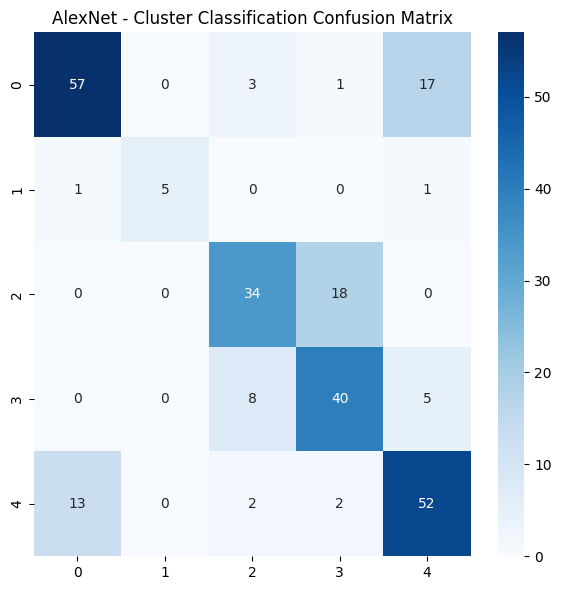

✅ AlexNet - Training complete, confusion matrix and classification report saved.
✅ All models trained, evaluated, and saved successfully!


In [18]:
import tensorflow as tf
from tensorflow.keras.applications import (
    VGG16, VGG19, MobileNetV2, ResNet50, DenseNet121, InceptionV3, Xception
)
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import os

# List of models
models = [
    ("VGG16", VGG16),
    ("VGG19", VGG19),
    ("MobileNetV2", MobileNetV2),
    ("ResNet50", ResNet50),
    ("DenseNet121", DenseNet121),
    ("InceptionV3", InceptionV3),
    ("Xception", Xception),
    ("AlexNet", None)  # Placeholder for custom AlexNet
]

# Custom AlexNet Model
def create_alexnet_model(input_shape=(128, 128, 3), num_classes=5):
    model = Sequential()

    model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax', name='cluster_output'))

    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Function to create each pre-trained model
def create_model(base_model_fn, input_shape=(128, 128, 3), num_classes=5):
    base_model = base_model_fn(include_top=False, weights='imagenet', input_shape=input_shape)
    base_model.trainable = False
    
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)

    cluster_output = Dense(num_classes, activation='softmax', name='cluster_output')(x)

    model = Model(inputs=base_model.input, outputs=[cluster_output])
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Ensure necessary folders exist
os.makedirs("/kaggle/working/agglomerative_saved_models", exist_ok=True)
os.makedirs("/kaggle/working/agglomerative_plots", exist_ok=True)
os.makedirs("/kaggle/working/agglomerative_confusion_matrices", exist_ok=True)
os.makedirs("/kaggle/working/agglomerative_classification_reports", exist_ok=True)

# Loop to train and evaluate all models
for model_name, model_fn in models:
    print(f"Training {model_name}...")
    
    # Create model
    if model_name == "AlexNet":
        model = create_alexnet_model()
    else:
        model = create_model(model_fn)

    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    checkpoint = ModelCheckpoint(f"/kaggle/working/agglomerative_saved_models/{model_name}_best_model.keras",monitor='val_loss', save_best_only=True, mode='min')

    history = model.fit(
        train_generator,
        epochs=200,
        validation_data=val_generator,
        callbacks=[early_stop, checkpoint]
    )

    model.save(f"/kaggle/working/agglomerative_saved_models/{model_name}_model.keras")

    # Plot Accuracy and Loss graphs
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title(f'{model_name} - Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(f'{model_name} - Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig(f"/kaggle/working/agglomerative_plots/{model_name}_accuracy_loss_plot.png")
    plt.show()

    val_pred = model.predict(val_generator)
    val_labels = val_generator.classes
    cluster_preds = val_pred.argmax(axis=1)

    cluster_cm = confusion_matrix(val_labels, cluster_preds)
    target_names = list(train_generator.class_indices.keys())
    cluster_report = classification_report(val_labels, cluster_preds, target_names=target_names)


    plt.figure(figsize=(6, 6))
    sns.heatmap(cluster_cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Cluster Classification Confusion Matrix')
    plt.tight_layout()
    plt.savefig(f"/kaggle/working/agglomerative_confusion_matrices/{model_name}_confusion_matrix.png")
    plt.show()

    with open(f"/kaggle/working/agglomerative_classification_reports/{model_name}_classification_report.txt", "w") as f:
        f.write("Cluster Classification Report:\n")
        f.write(cluster_report)

    print(f"✅ {model_name} - Training complete, confusion matrix and classification report saved.")

print("✅ All models trained, evaluated, and saved successfully!")

# Saving into .zip file all outputs

In [19]:
import shutil
shutil.make_archive('/kaggle/working/model_outputs', 'zip', '/kaggle/working')

'/kaggle/working/model_outputs.zip'

# Outputs Comparison

## 📊 Model Performance Comparison - K Means Clustering

This project evaluates and compares the performance of various deep learning models on an audio-based cough classification task. Below are the performance metrics for each model:

| Model        | Accuracy | Macro Precision | Macro Recall | Macro F1-Score |
|--------------|----------|------------------|---------------|----------------|
| AlexNet      | 0.72     | 0.71             | 0.72          | 0.70           |
| DenseNet121  | 0.75     | 0.73             | 0.74          | 0.74           |
| InceptionV3  | 0.74     | 0.74             | 0.72          | 0.72           |
| MobileNetV2  | 0.77     | 0.75             | 0.76          | 0.75           |
| ResNet50     | 0.37     | 0.20             | 0.32          | 0.23           |
| VGG16        | 0.66     | 0.65             | 0.63          | 0.64           |
| VGG19        | 0.68     | 0.66             | 0.65          | 0.65           |
| Xception     | 0.72     | 0.70             | 0.70          | 0.70           |

### ✅ Best Performing Model

**🏆 MobileNetV2** is the best performing model among all the tested architectures.

### Why MobileNetV2?
MobileNetV2 achieved the highest scores across most metrics:
- **Accuracy:** 0.77 (Highest)
- **Macro Precision:** 0.75
- **Macro Recall:** 0.76
- **Macro F1-Score:** 0.75

MobileNetV2 strikes a good balance between accuracy and computational efficiency, making it suitable for deployment in real-time or mobile applications. Its performance on all metrics demonstrates robustness and consistency in identifying both cough and non-cough audio signals.

---

---
## 📊 Model Performance Comparison - Agglomerative Clustering

| Model        | Accuracy | Precision (Macro Avg) | Recall (Macro Avg) | F1 Score (Macro Avg) |
|--------------|----------|------------------------|---------------------|----------------------|
| **AlexNet**      | **0.84**   | **0.82**                 | **0.86**              | **0.83**                |
| DenseNet121  | 0.83     | 0.81                   | 0.83                | 0.82                  |
| MobileNetV2  | 0.82     | 0.82                   | 0.83                | 0.83                  |
| Xception     | 0.81     | 0.80                   | 0.81                | 0.80                  |
| InceptionV3  | 0.74     | 0.73                   | 0.73                | 0.73                  |
| VGG16        | 0.70     | 0.56                   | 0.59                | 0.57                  |
| VGG19        | 0.66     | 0.53                   | 0.55                | 0.53                  |
| ResNet50     | 0.42     | 0.34                   | 0.34                | 0.34                  |

---

### ✅ Best Performing Model

**🏆 AlexNet** is the best performing model among all the tested architectures.

### 🔍 Why AlexNet?
- **Highest Accuracy**: 0.84
- **Best F1 Score**: 0.83 (tied with MobileNetV2)
- **Best Recall**: 0.86 (excellent at identifying true positives)
- **Balanced Precision and Recall**: Demonstrates consistent performance across all metrics
---
### 🧠 Summary:
##### AlexNet showed superior generalization capabilities and consistent performance across all classes, making it the best choice for this multiclass classification task.
---
"""


# Testing Phase

The Testing Data was mentioned in the Testing Files folder

## Testing on Aggliometry Clustering Trained Model on New Data

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os

# Constants
IMG_HEIGHT = 128
IMG_WIDTH = 128
CLASS_NAMES = ['Fresh', 'Slightly Fresh', 'Slate', 'Spoiled', 'Rotten']  # 🔁 Update based on your classes

# Model names used during training
model_names = ['AlexNet', 'VGG16', 'VGG19', 'MobileNetV2', 'ResNet50', 'DenseNet121', 'InceptionV3', 'Xception']

# Base path where saved models are stored
model_base_path = '/kaggle/input/food-freshness-detection-saved-models/Agglomerative Saved Models'

# Image paths to test (update with actual image paths)
image_paths = [
    '/kaggle/input/food-freshness-dataset-testing/RottenMango_1.jpg',
    '/kaggle/input/food-freshness-dataset-testing/RottenMango_2.jpg',
    '/kaggle/input/food-freshness-dataset-testing/RottenMango_3.jpg'
    # Add more test images here
]

# Loop through all models
for model_name in model_names:
    model_path = os.path.join(model_base_path, f"{model_name}_best_model.keras")

    if not os.path.exists(model_path):
        print(f"⚠️ Model file not found for {model_name}. Skipping...")
        continue

    # Load model
    print(f"\n🔄 Testing with model: {model_name}")
    model = load_model(model_path)

    for img_path in image_paths:
        try:
            # Load and preprocess the image
            img = load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
            img_array = img_to_array(img) / 255.0
            img_array = np.expand_dims(img_array, axis=0)

            # Predict
            prediction = model.predict(img_array)
            predicted_class = CLASS_NAMES[np.argmax(prediction)]

            print(f"📸 Image: {os.path.basename(img_path)}")
            print(f"🧠 {model_name} Prediction: {predicted_class}")
            print(f"📊 Probabilities: {prediction[0]}")
            print("-" * 50)

        except Exception as e:
            print(f"❌ Error processing {img_path} with {model_name}: {e}")


🔄 Testing with model: AlexNet
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step
📸 Image: RottenMango_1.jpg
🧠 AlexNet Prediction: Slate
📊 Probabilities: [7.1004755e-04 1.7084109e-04 6.9474602e-01 3.9947740e-06 3.0436918e-01]
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
📸 Image: RottenMango_2.jpg
🧠 AlexNet Prediction: Slate
📊 Probabilities: [1.7133959e-03 5.7647799e-06 9.9229652e-01 8.9011075e-07 5.9833978e-03]
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
📸 Image: RottenMango_3.jpg
🧠 AlexNet Prediction: Rotten
📊 Probabilities: [9.2986724e-05 9.6699013e-04 2.7119024e-02 6.7958917e-06 9.7181422e-01]
--------------------------------------------------

🔄 Testing with model: VGG16
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step
📸 Image: RottenMango_1.jpg
🧠 VGG16 Prediction: Rotten
📊 Probabilities: [0.02234961 0.0402705  0.23745376 0.00245494 0.69747126]
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━

## Testing on K Means Clustering Trained Model on New Data

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os

# Constants
IMG_HEIGHT = 128
IMG_WIDTH = 128
CLASS_NAMES = ['Fresh', 'Slightly Fresh', 'Slate', 'Spoiled', 'Rotten']  # 🔁 Update based on your classes

# Model names used during training
model_names = ['AlexNet', 'VGG16', 'VGG19', 'MobileNetV2', 'ResNet50', 'DenseNet121', 'InceptionV3', 'Xception']

# Base path where saved models are stored
model_base_path = '/kaggle/input/food-freshness-detection-saved-models/K Means Clustering Saved Models'

# Image paths to test (update with actual image paths)
image_paths = [
    '/kaggle/input/food-freshness-dataset-testing/RottenMango_1.jpg',
    '/kaggle/input/food-freshness-dataset-testing/RottenMango_2.jpg',
    '/kaggle/input/food-freshness-dataset-testing/RottenMango_3.jpg'
    # Add more test images here
]

# Loop through all models
for model_name in model_names:
    model_path = os.path.join(model_base_path, f"{model_name}_best_model.keras")

    if not os.path.exists(model_path):
        print(f"⚠️ Model file not found for {model_name}. Skipping...")
        continue

    # Load model
    print(f"\n🔄 Testing with model: {model_name}")
    model = load_model(model_path)

    for img_path in image_paths:
        try:
            # Load and preprocess the image
            img = load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
            img_array = img_to_array(img) / 255.0
            img_array = np.expand_dims(img_array, axis=0)

            # Predict
            prediction = model.predict(img_array)
            predicted_class = CLASS_NAMES[np.argmax(prediction)]

            print(f"📸 Image: {os.path.basename(img_path)}")
            print(f"🧠 {model_name} Prediction: {predicted_class}")
            print(f"📊 Probabilities: {prediction[0]}")
            print("-" * 50)

        except Exception as e:
            print(f"❌ Error processing {img_path} with {model_name}: {e}")


🔄 Testing with model: AlexNet
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step
📸 Image: RottenMango_1.jpg
🧠 AlexNet Prediction: Spoiled
📊 Probabilities: [2.3793022e-04 9.3374154e-05 2.1644202e-01 7.7964526e-01 3.5814017e-03]
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
📸 Image: RottenMango_2.jpg
🧠 AlexNet Prediction: Spoiled
📊 Probabilities: [3.8169976e-04 1.3272089e-04 2.8569916e-01 7.1000212e-01 3.7842663e-03]
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
📸 Image: RottenMango_3.jpg
🧠 AlexNet Prediction: Spoiled
📊 Probabilities: [7.6285236e-05 1.3287029e-05 3.5021973e-01 6.4914507e-01 5.4561149e-04]
--------------------------------------------------

🔄 Testing with model: VGG16
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step
📸 Image: RottenMango_1.jpg
🧠 VGG16 Prediction: Spoiled
📊 Probabilities: [0.00834764 0.00331097 0.26273257 0.65927017 0.06633866]
--------------------------------------------------
1/1 ━━━━━━━━━━━